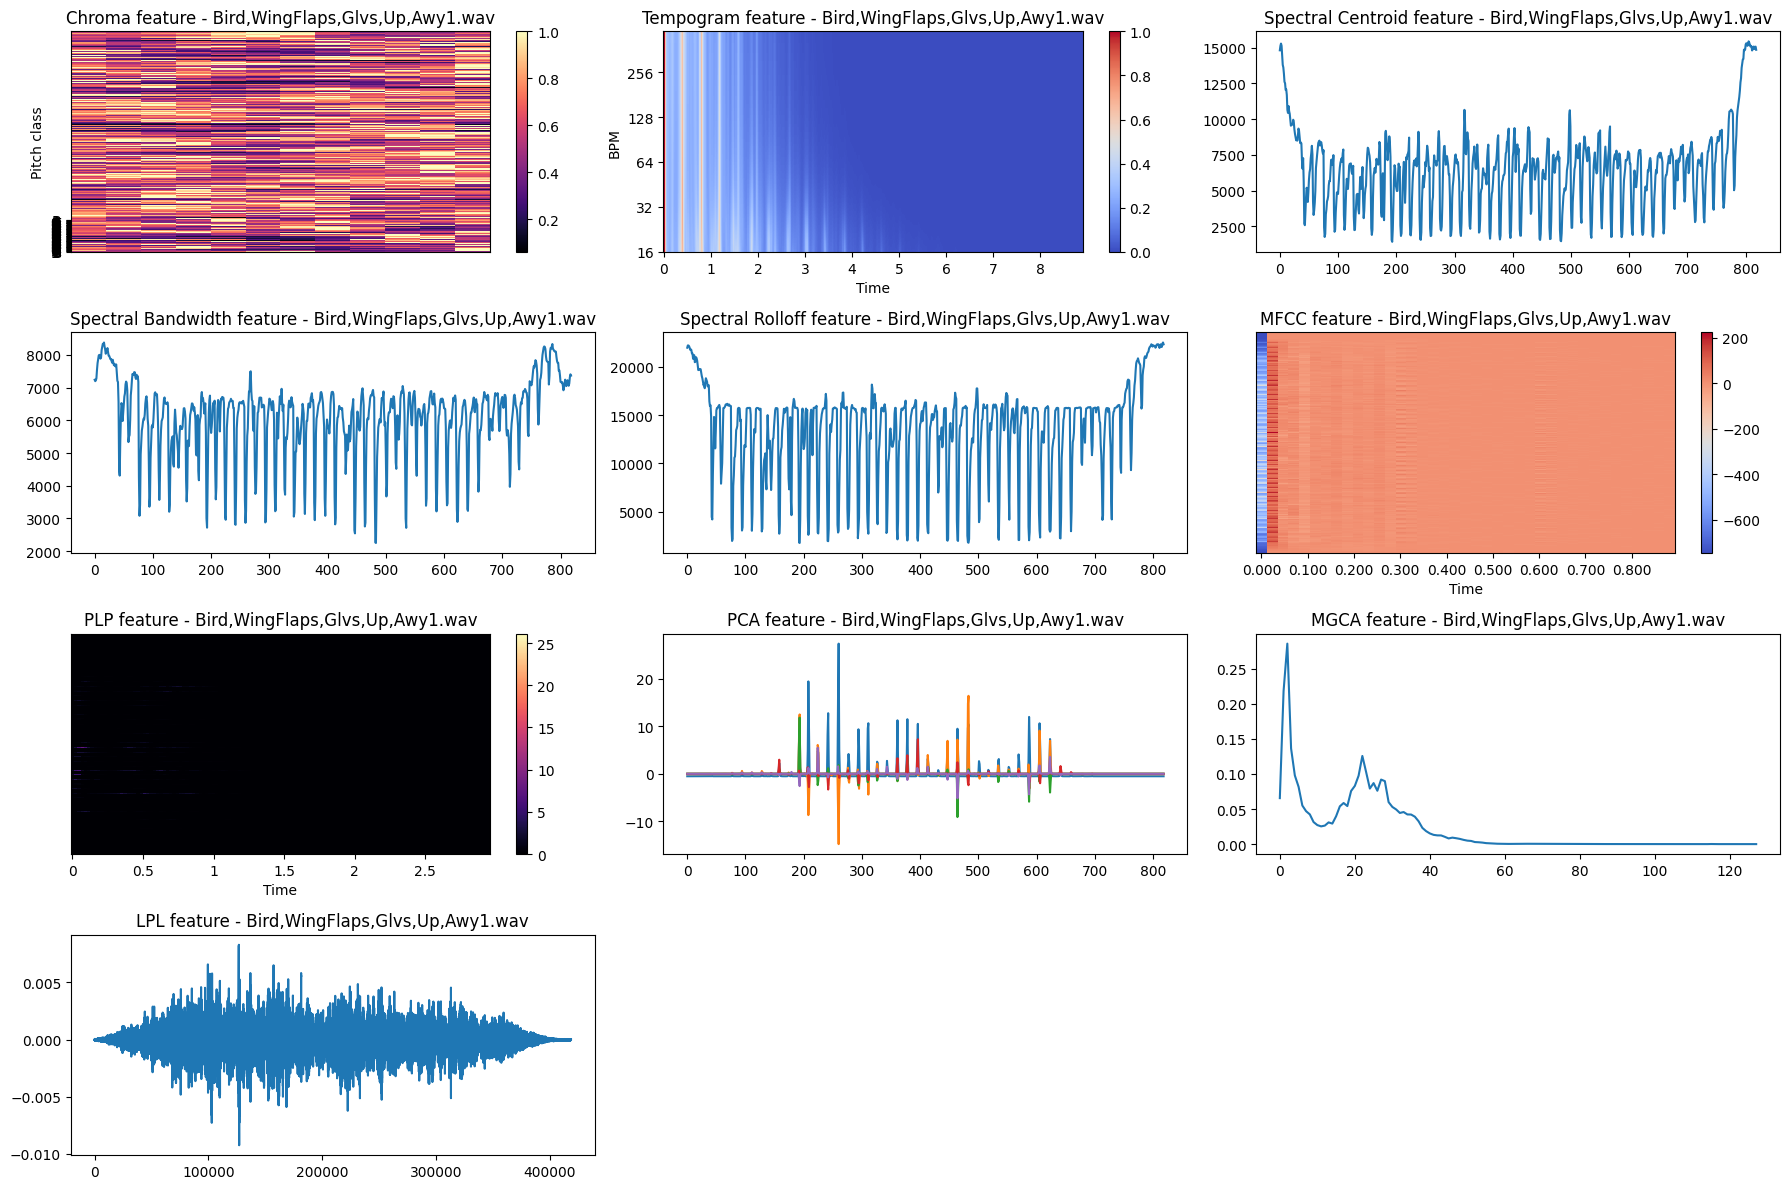

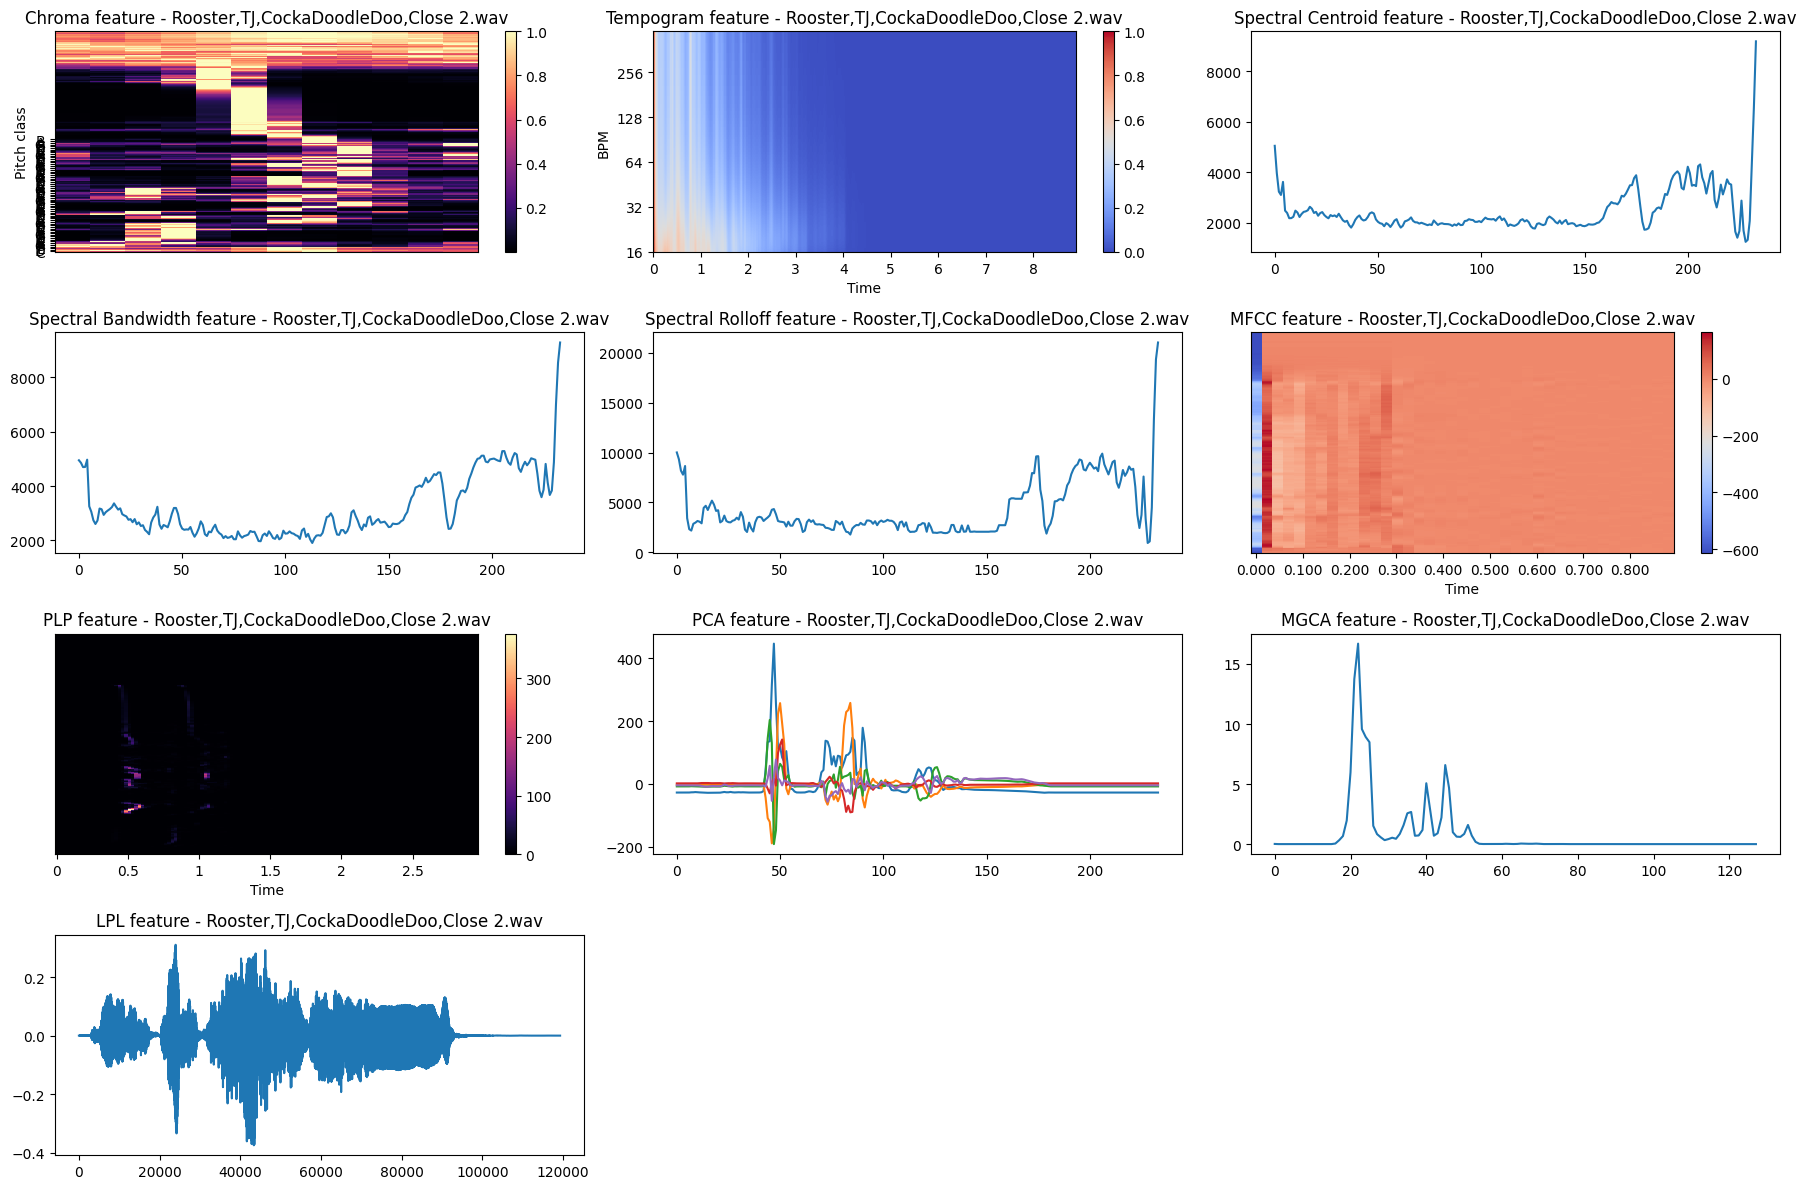

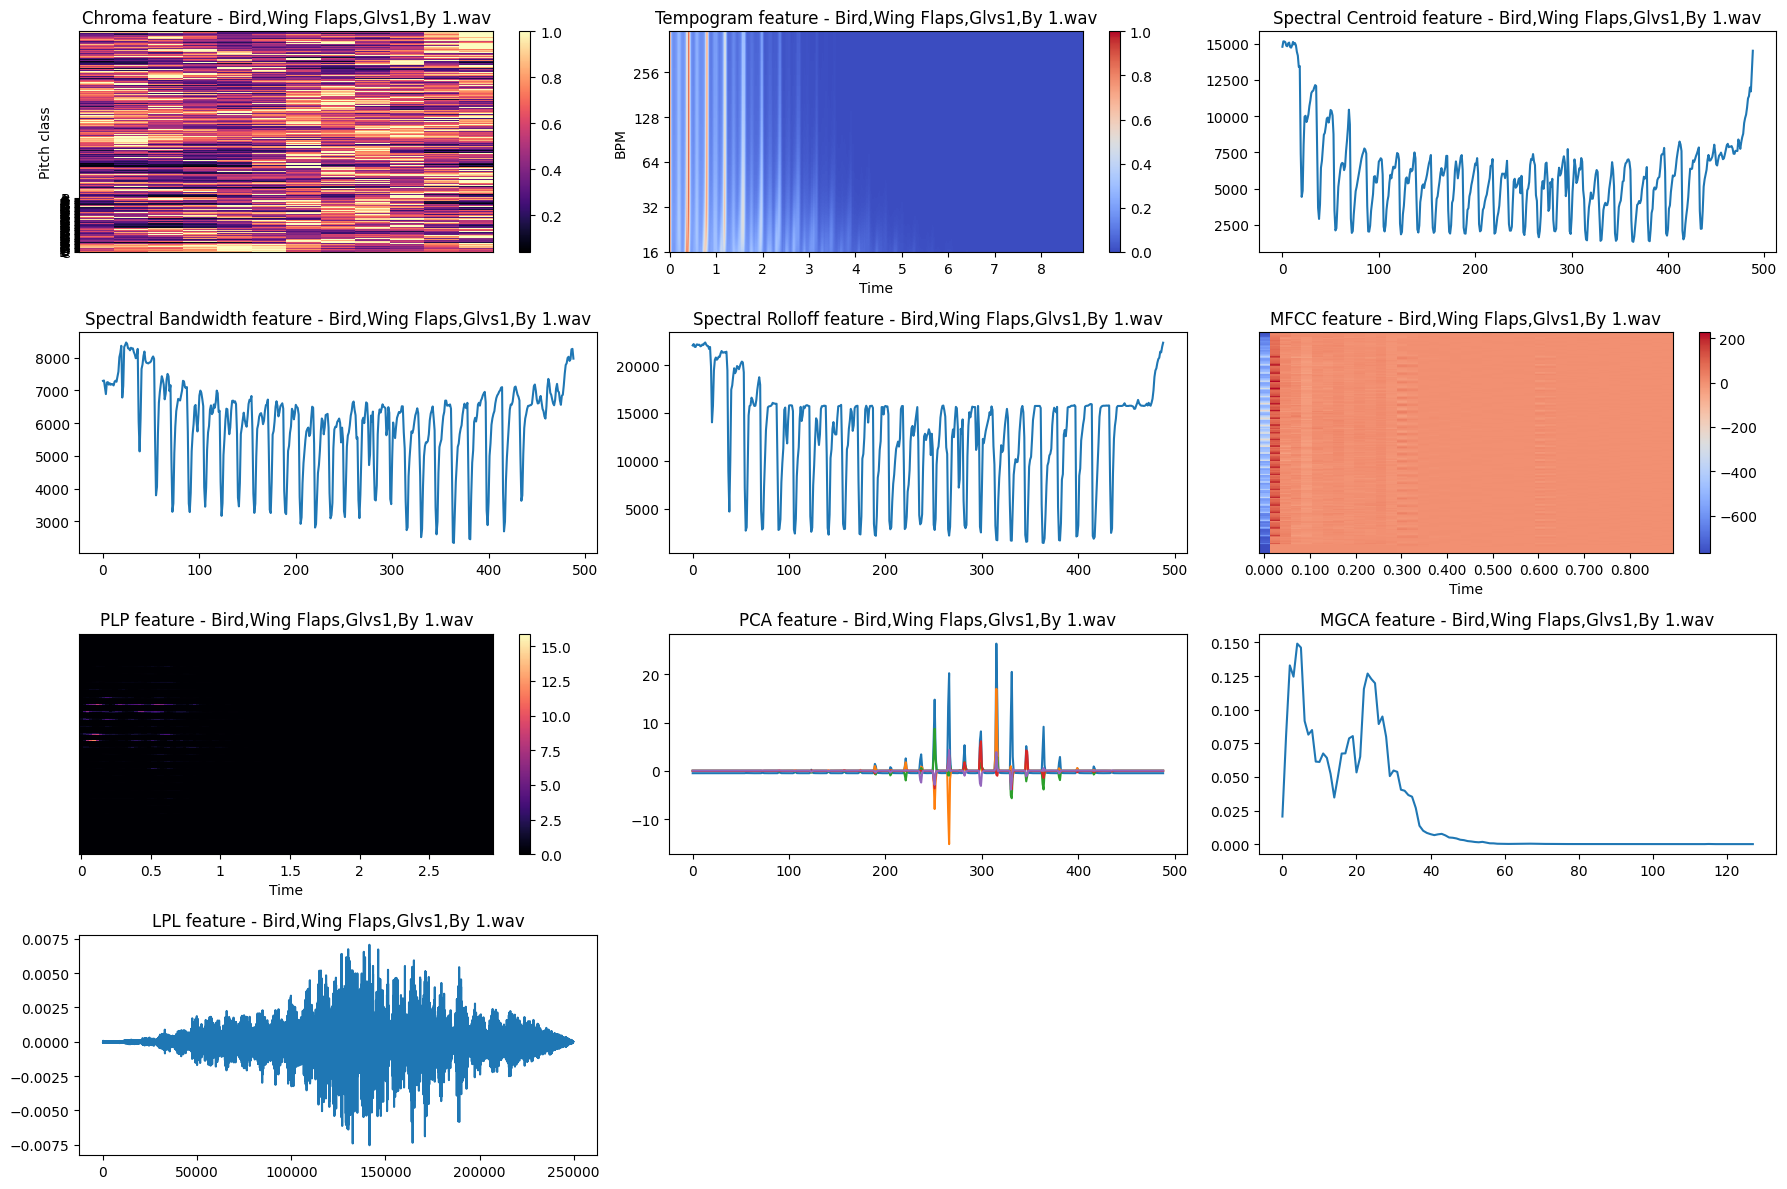

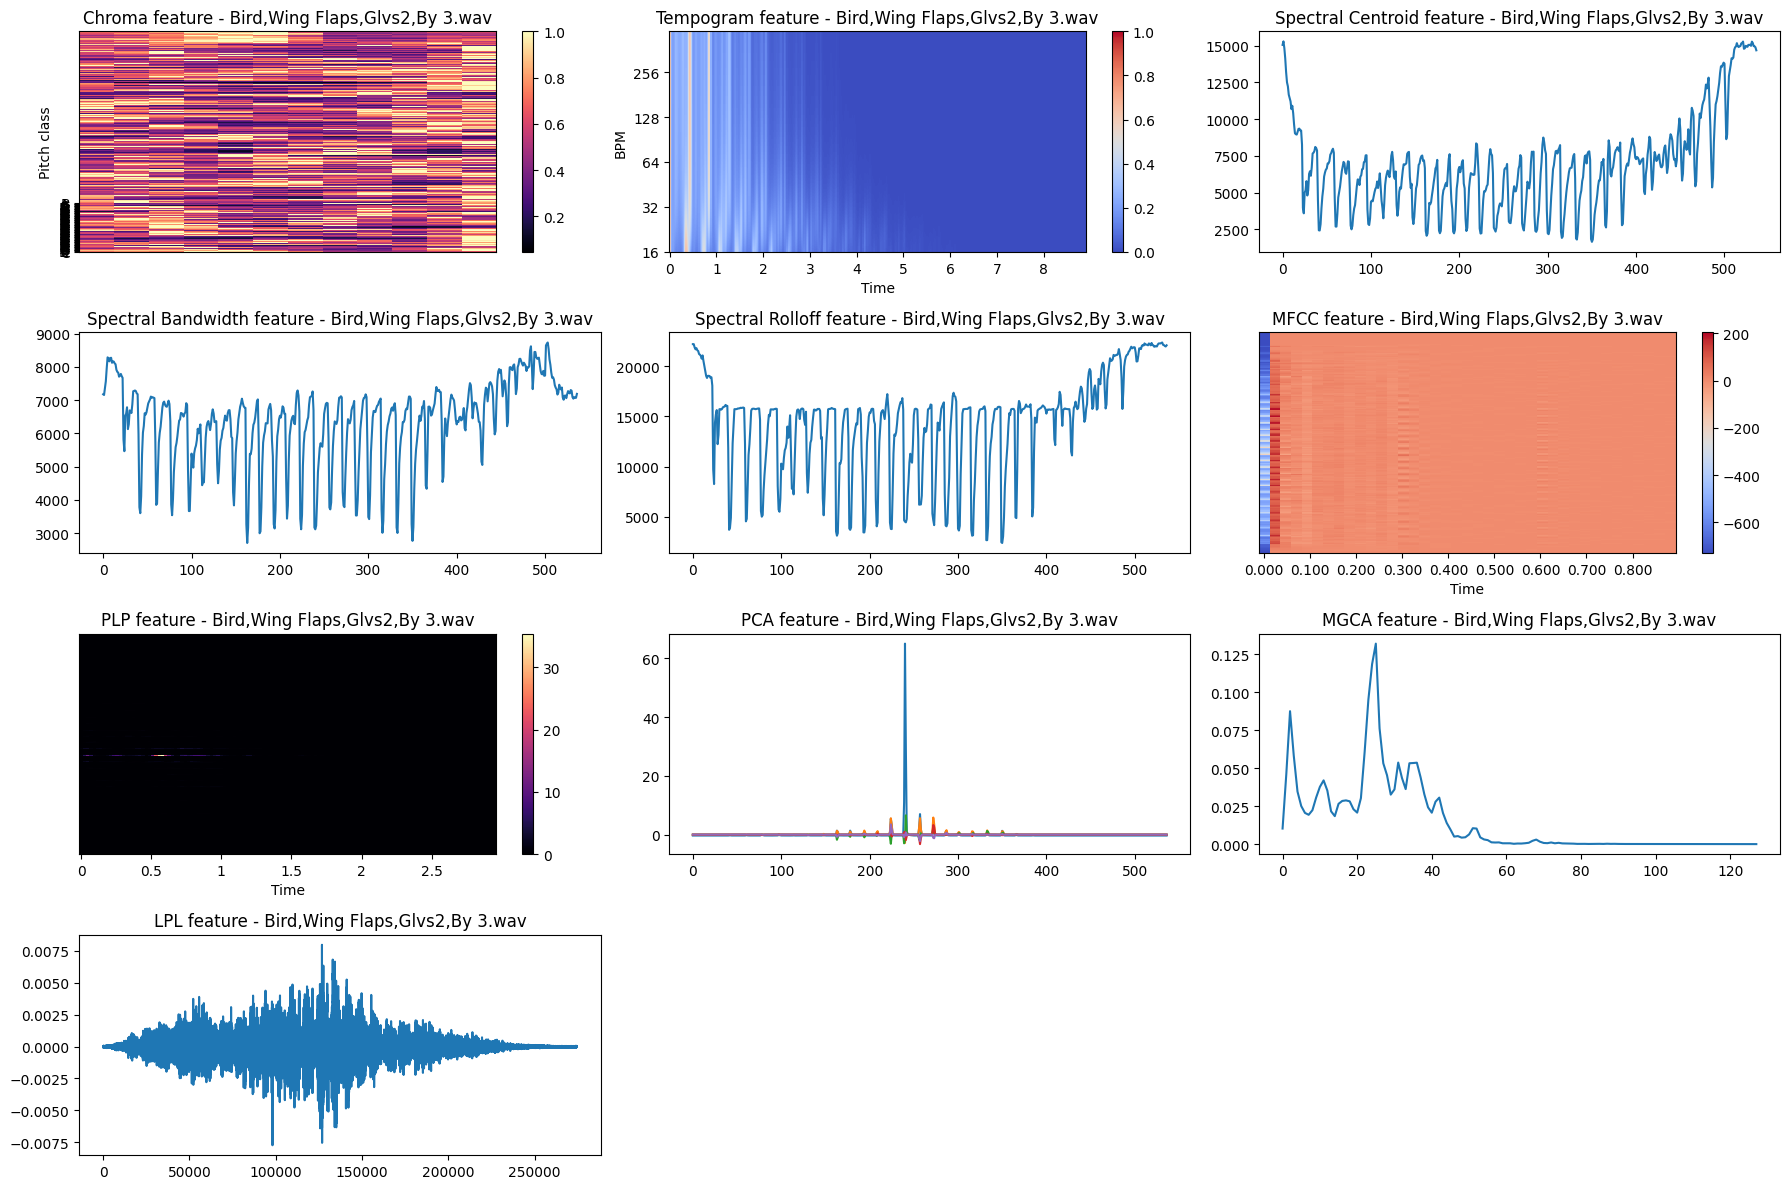

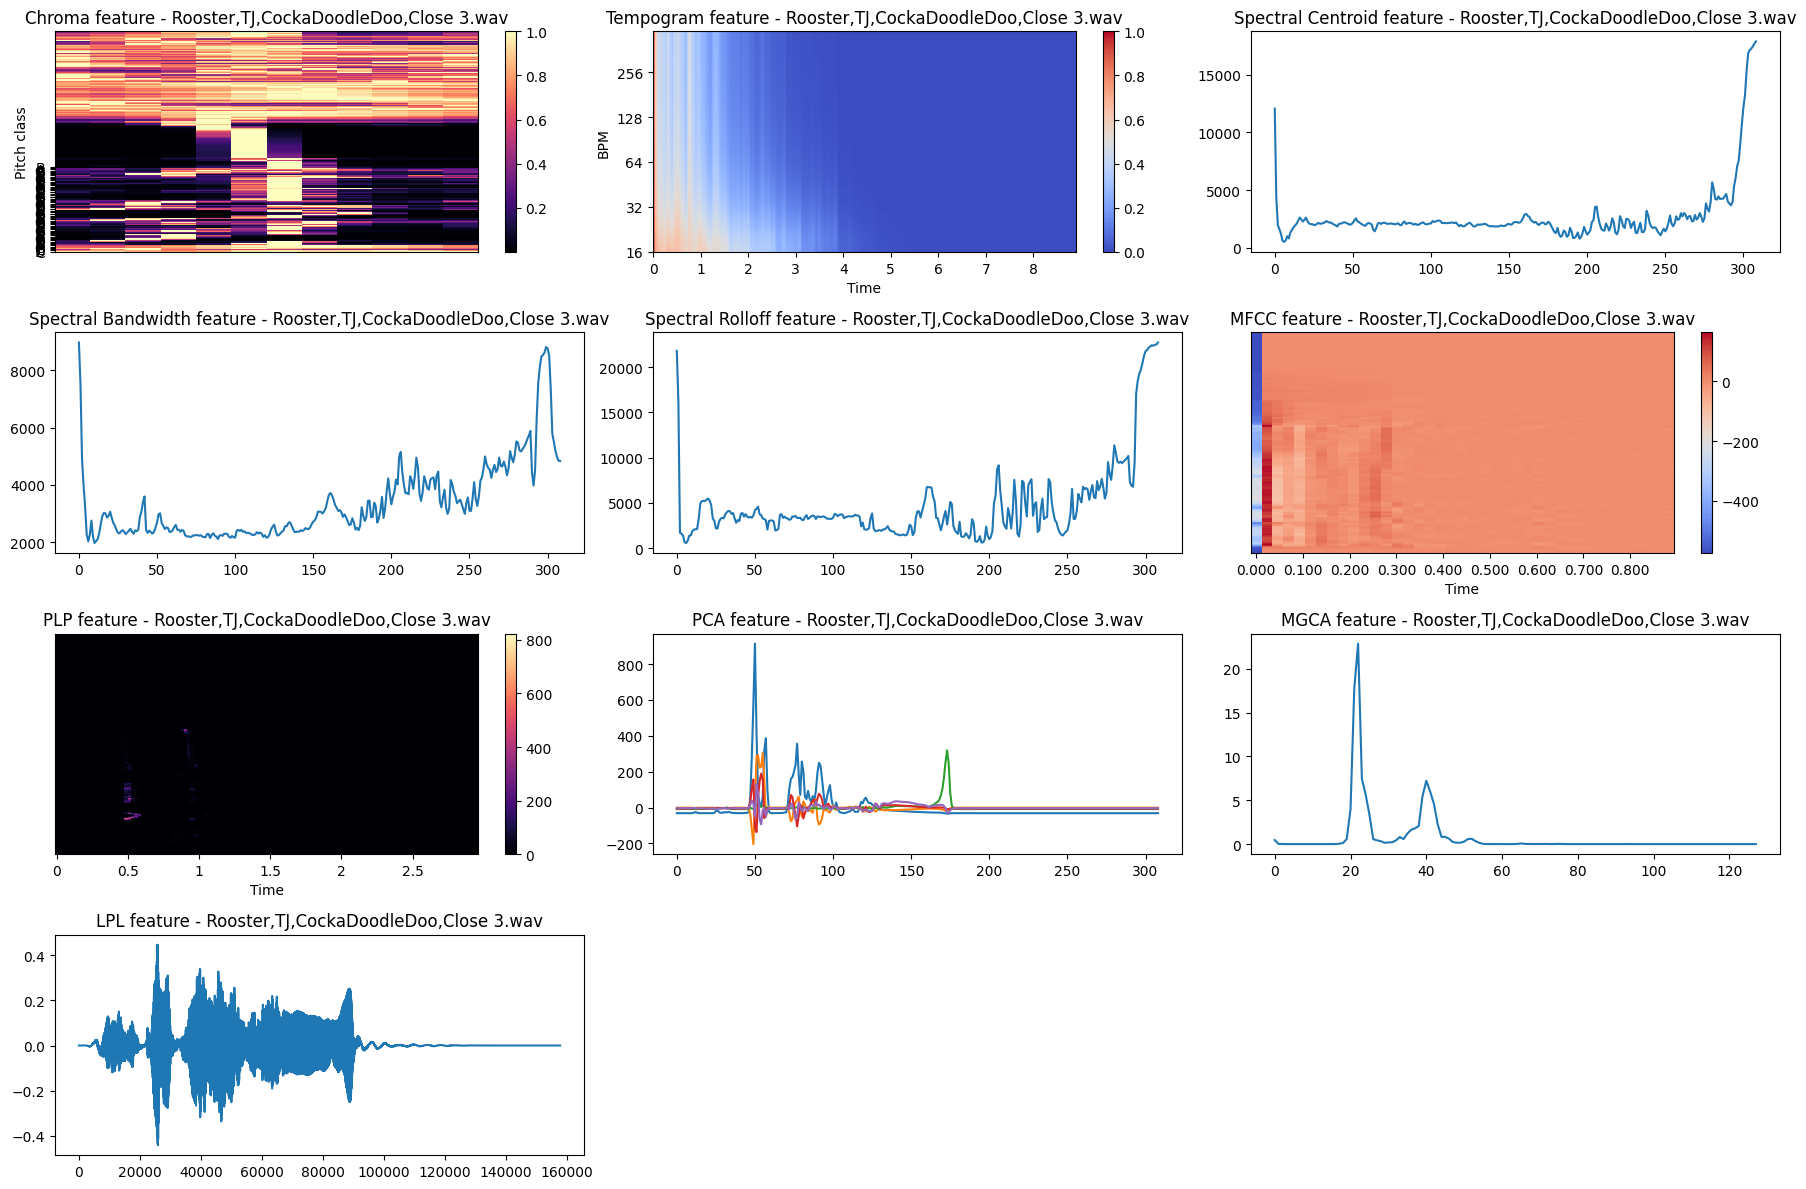

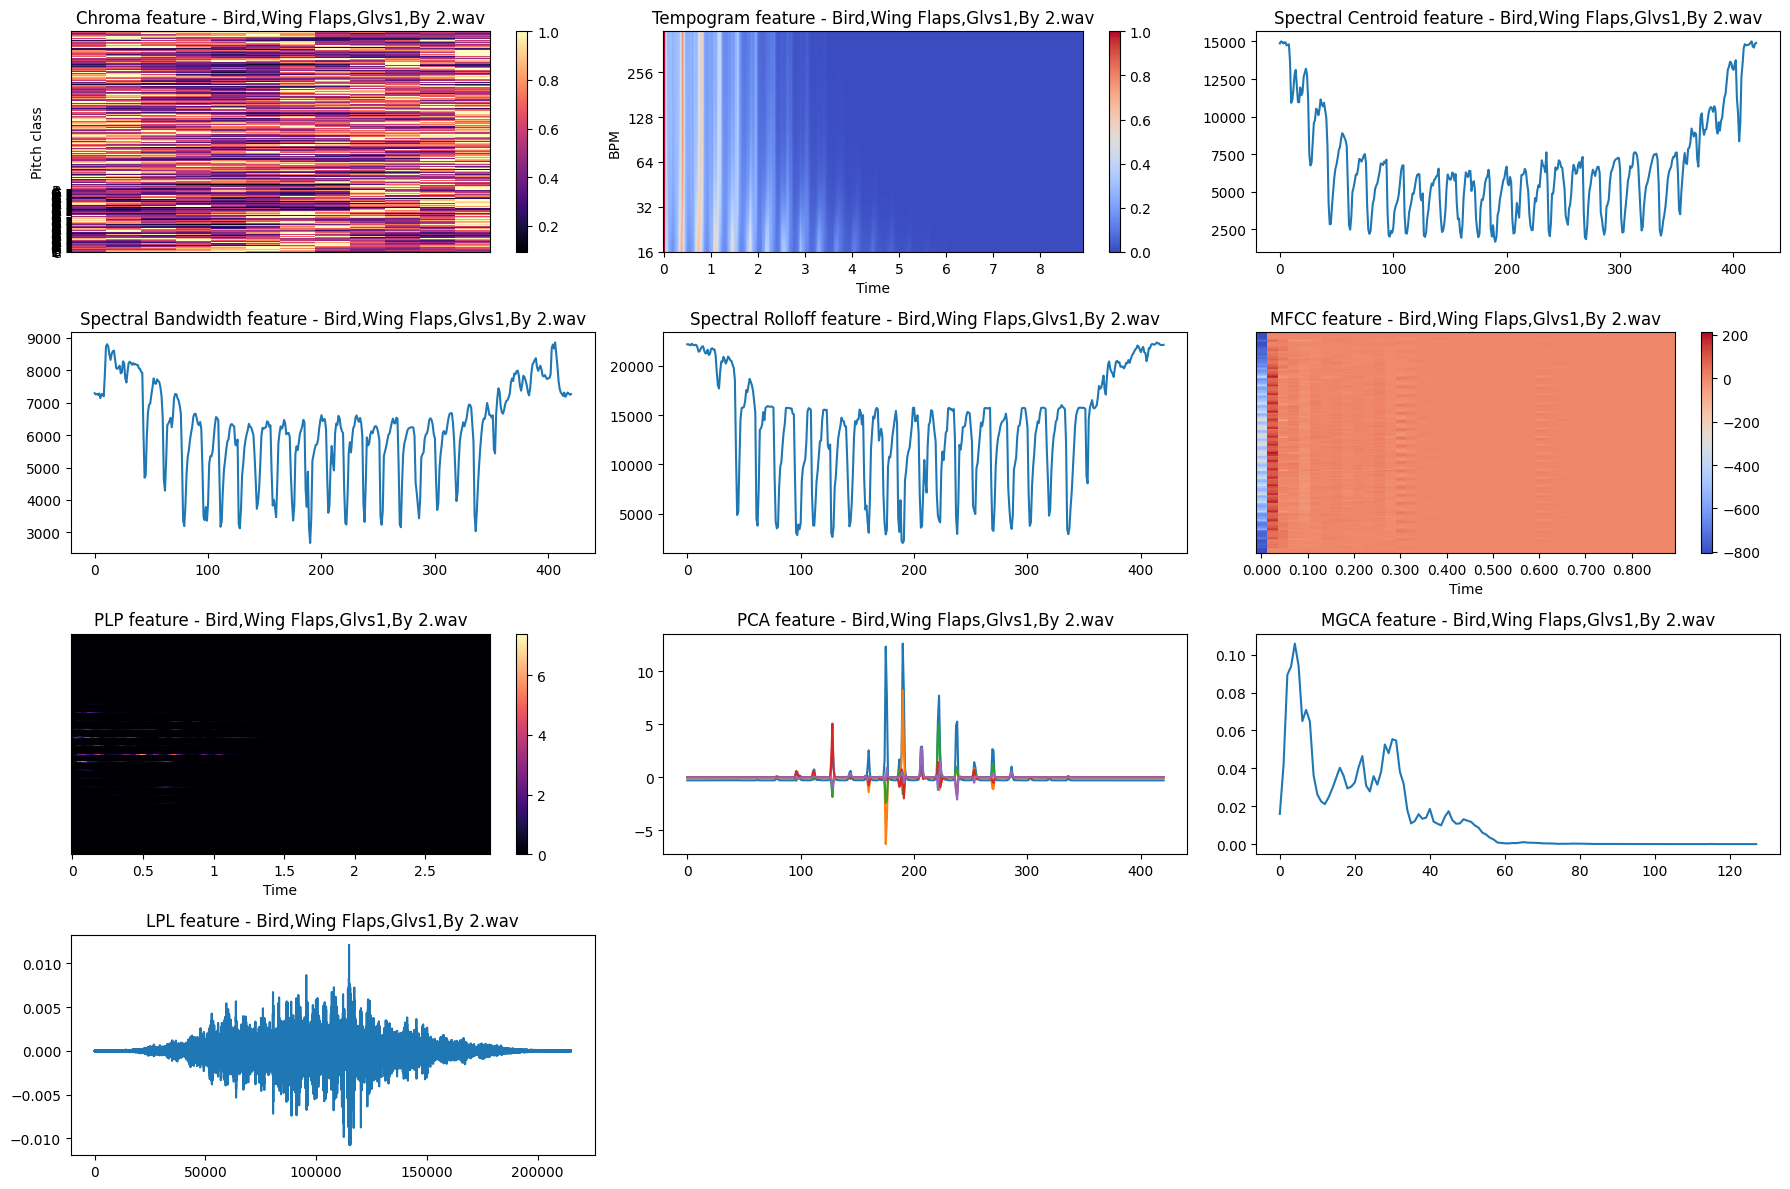

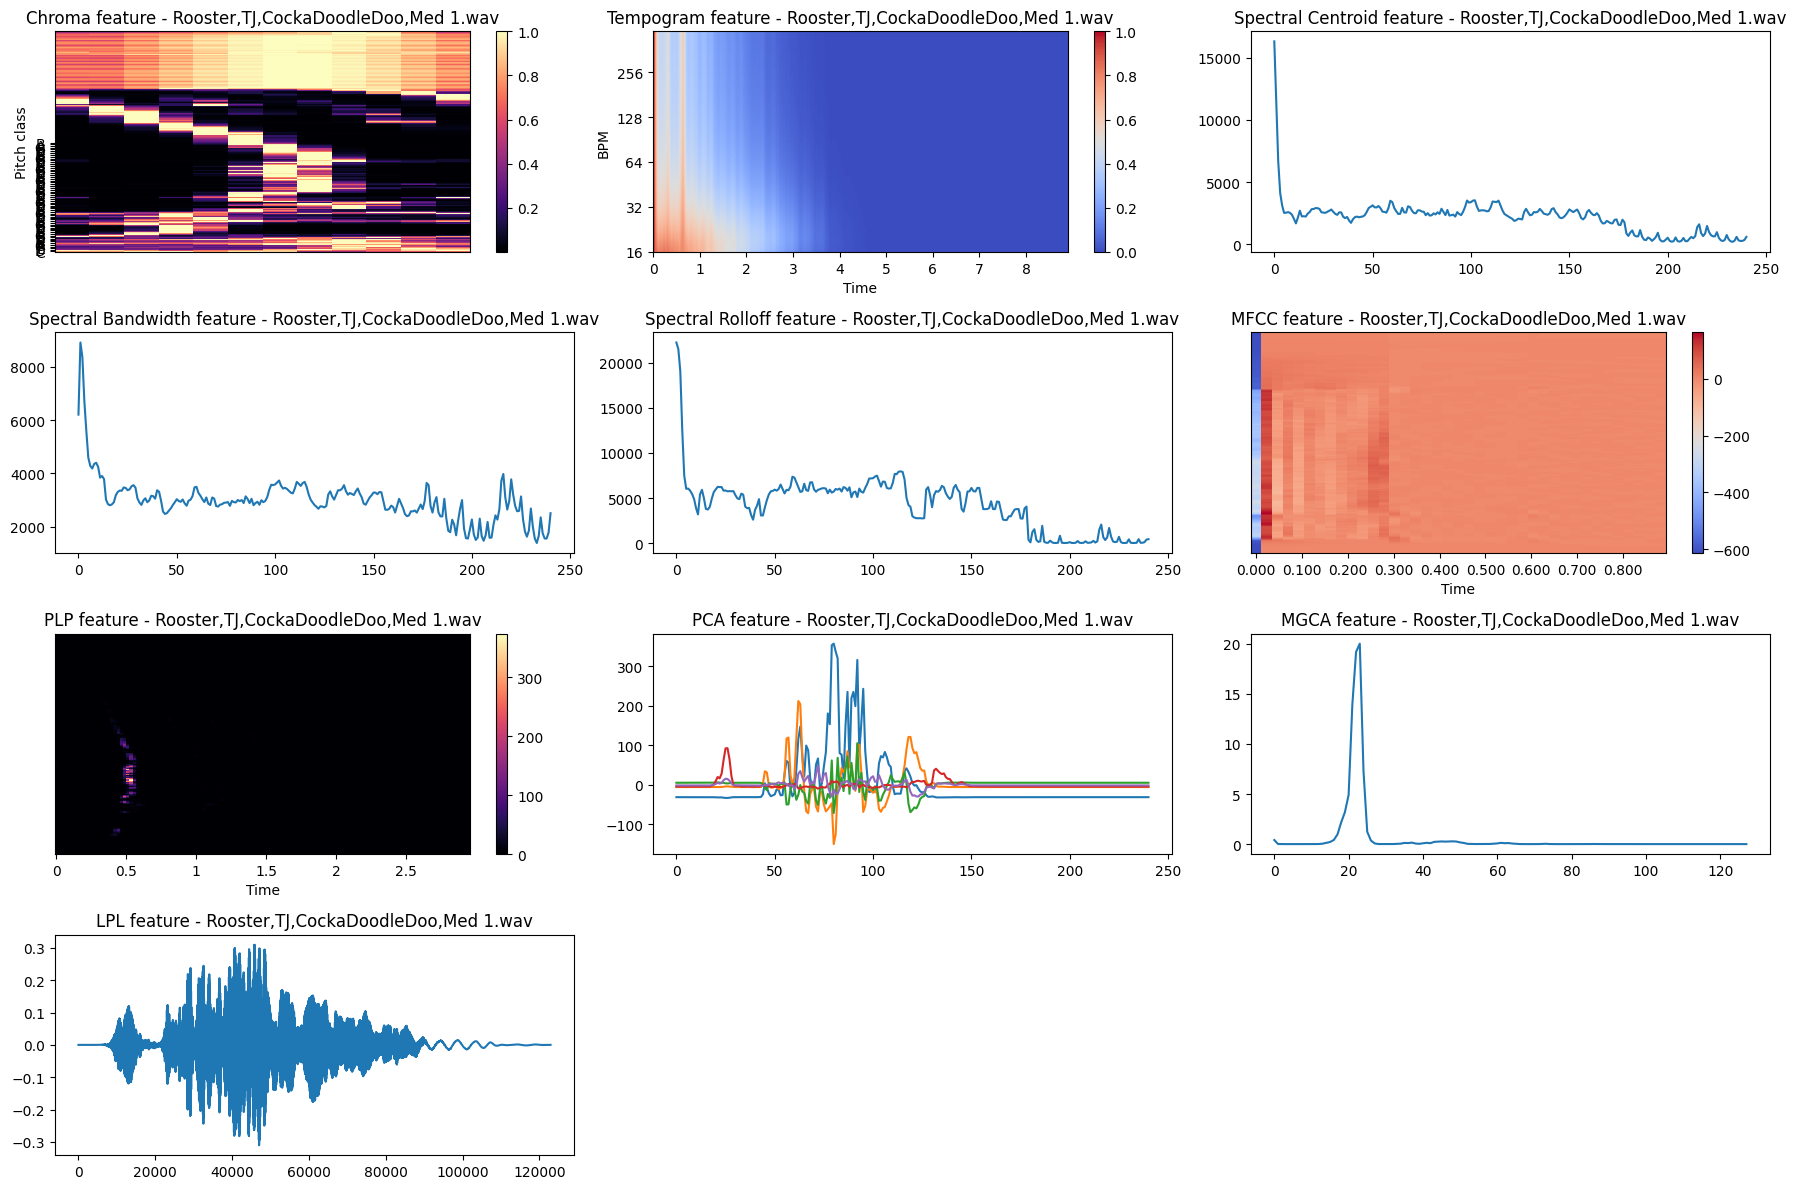

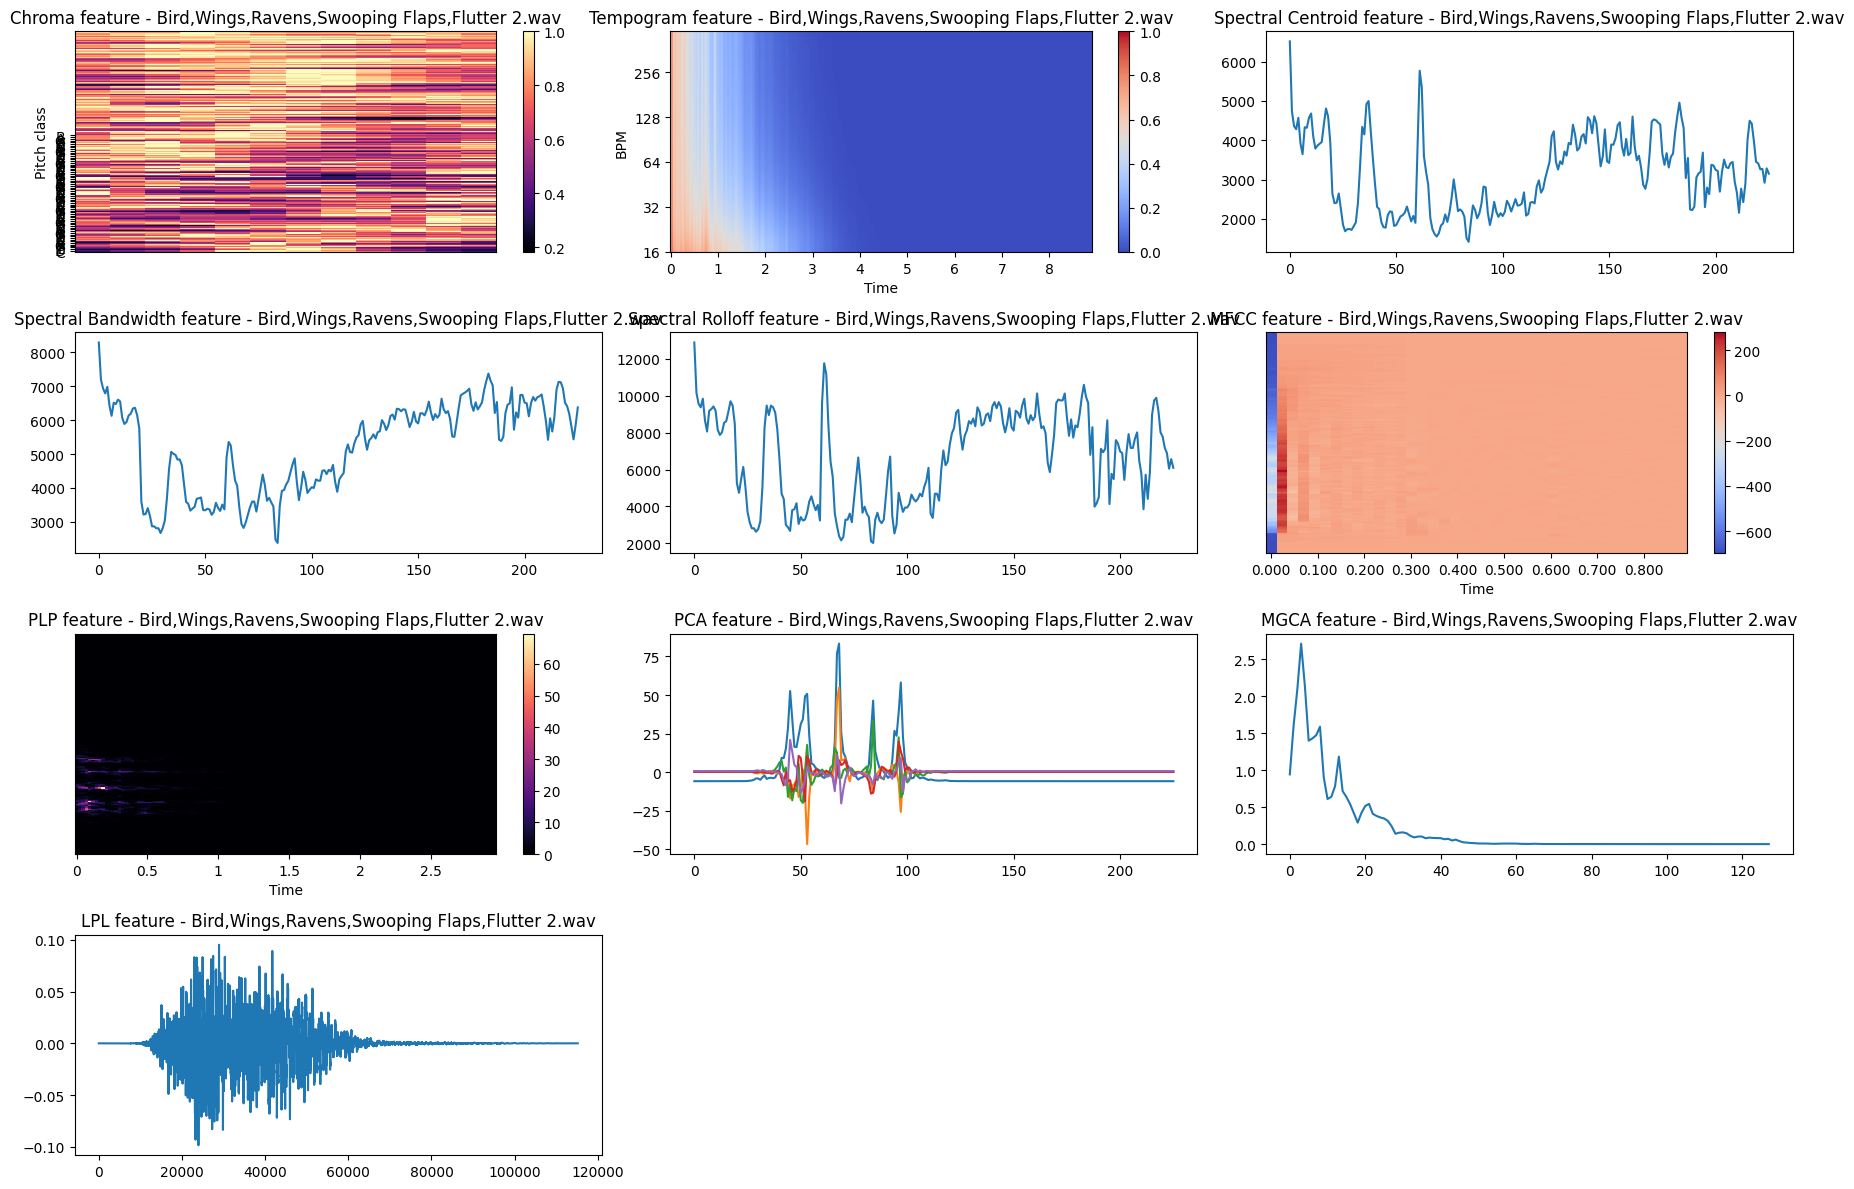

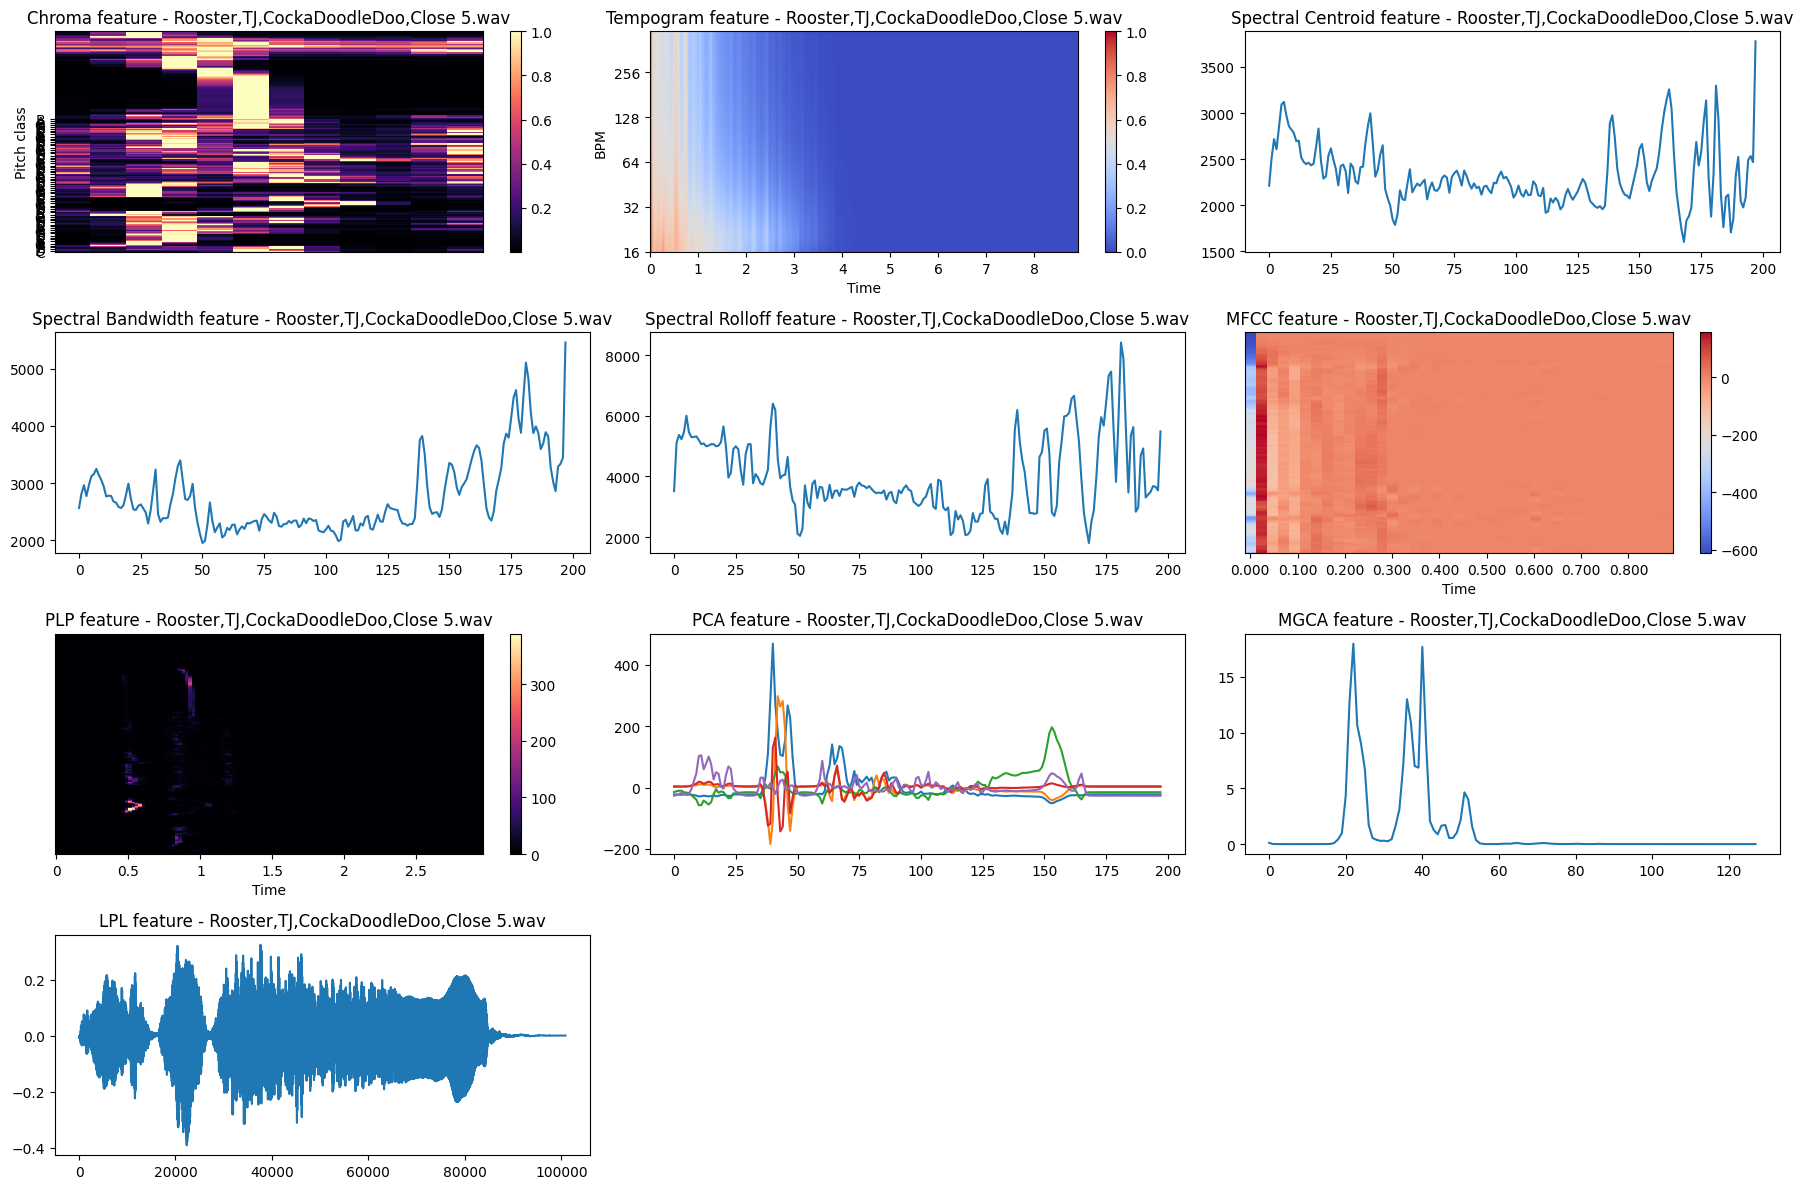

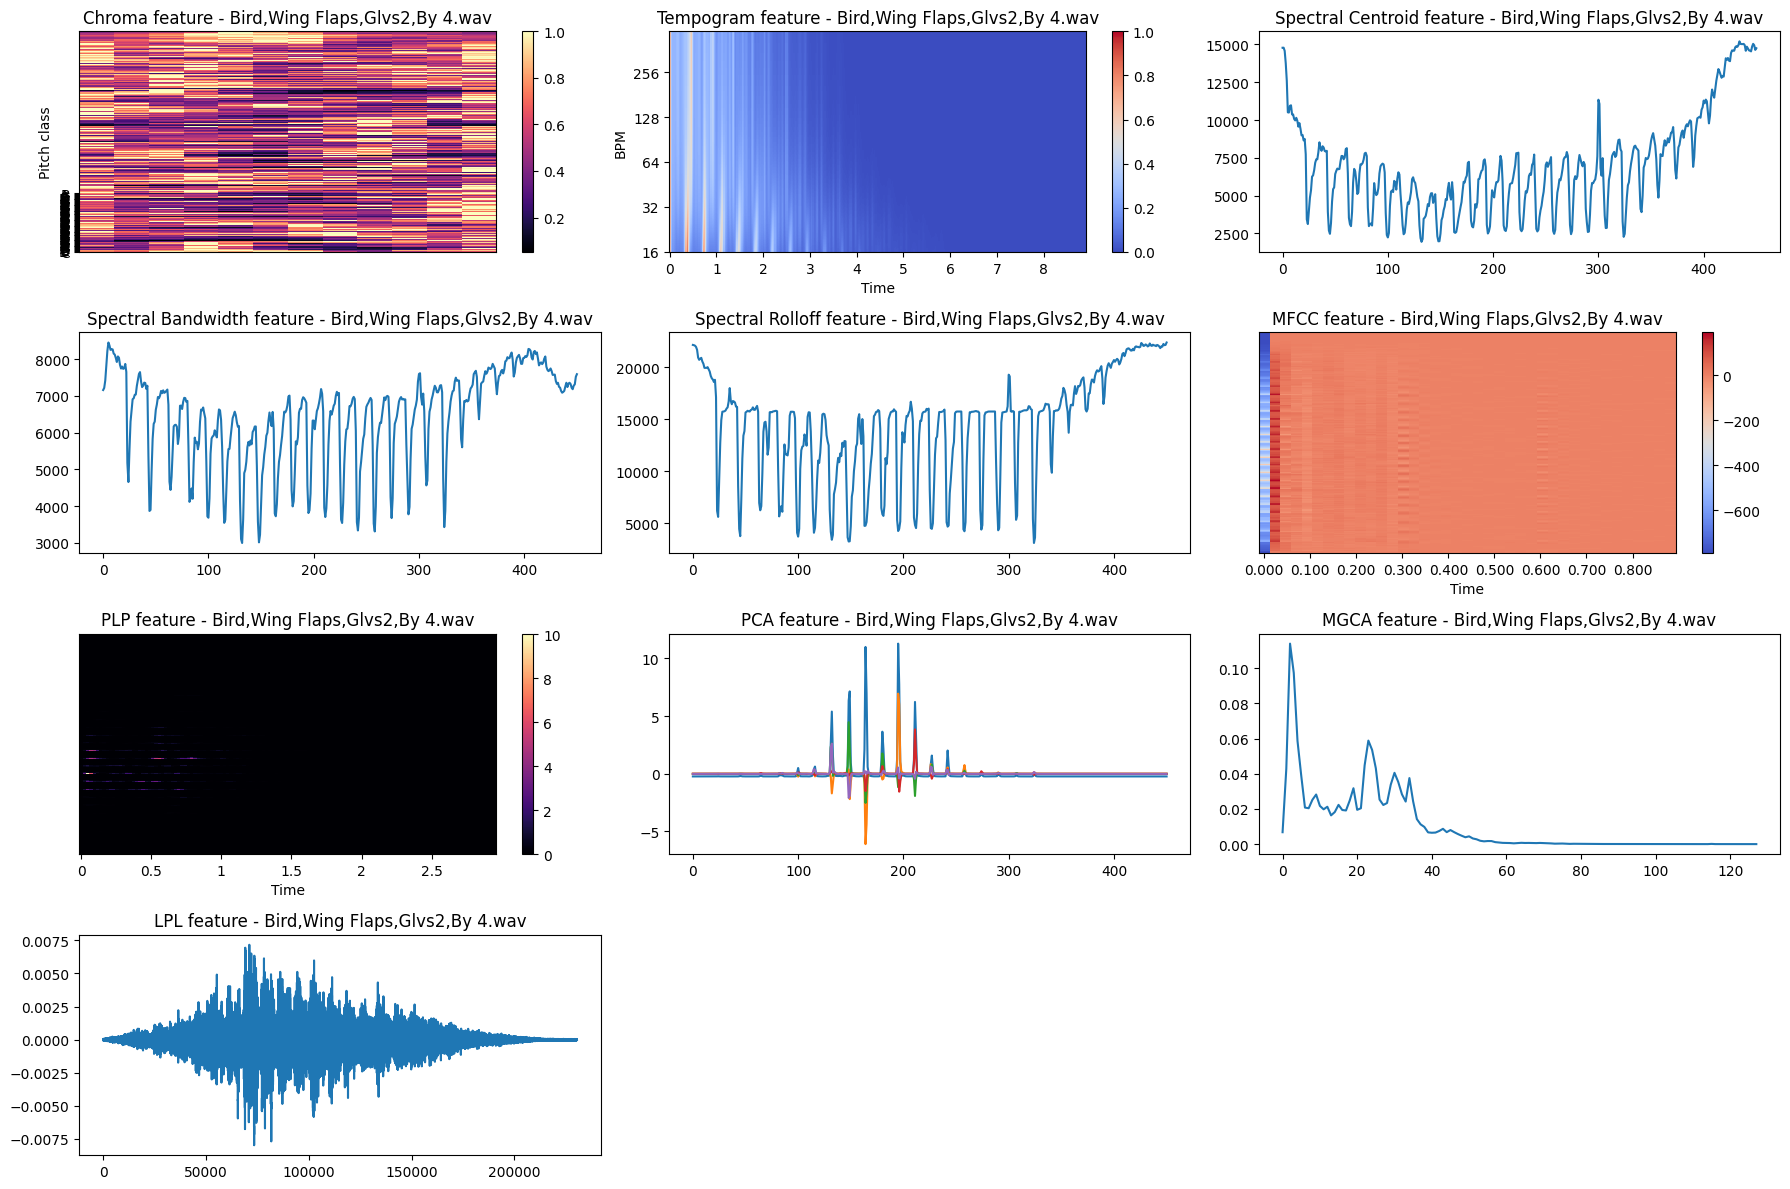

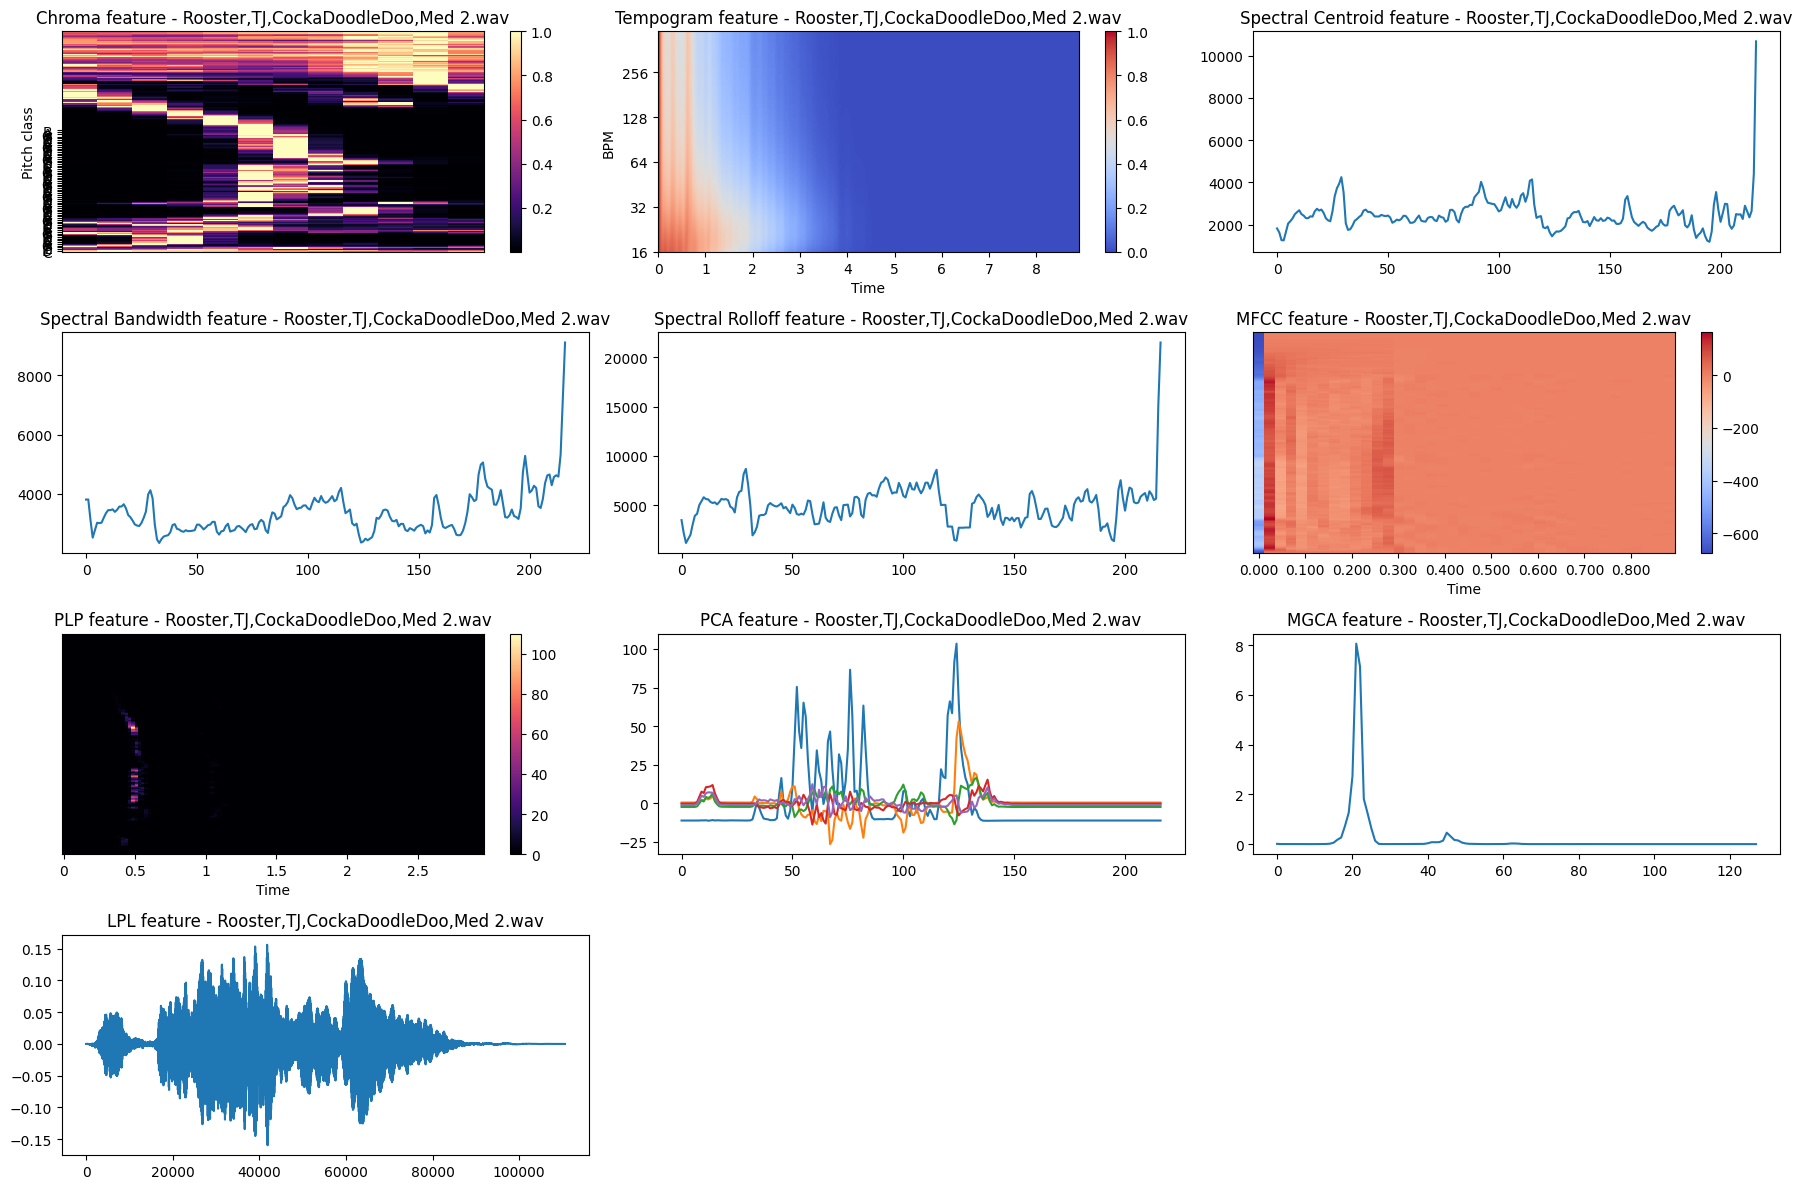

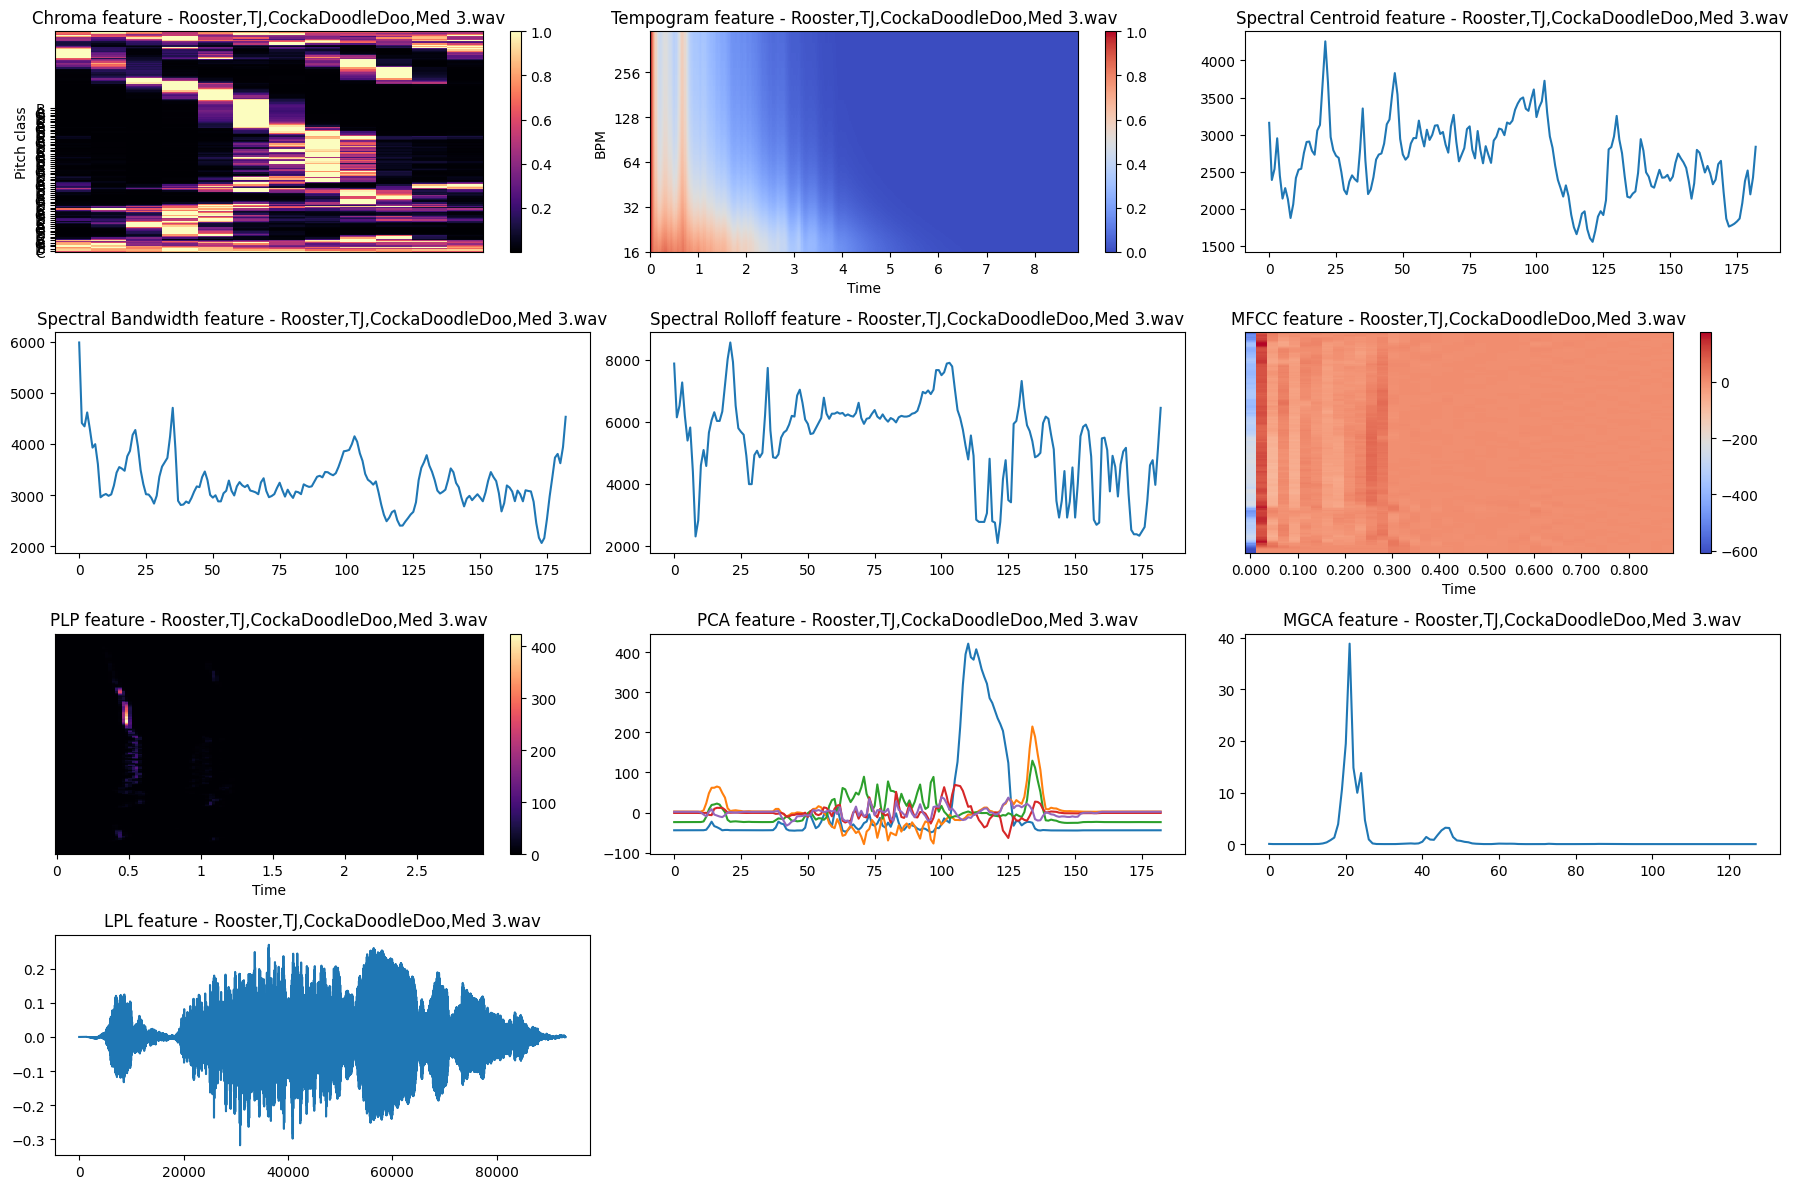

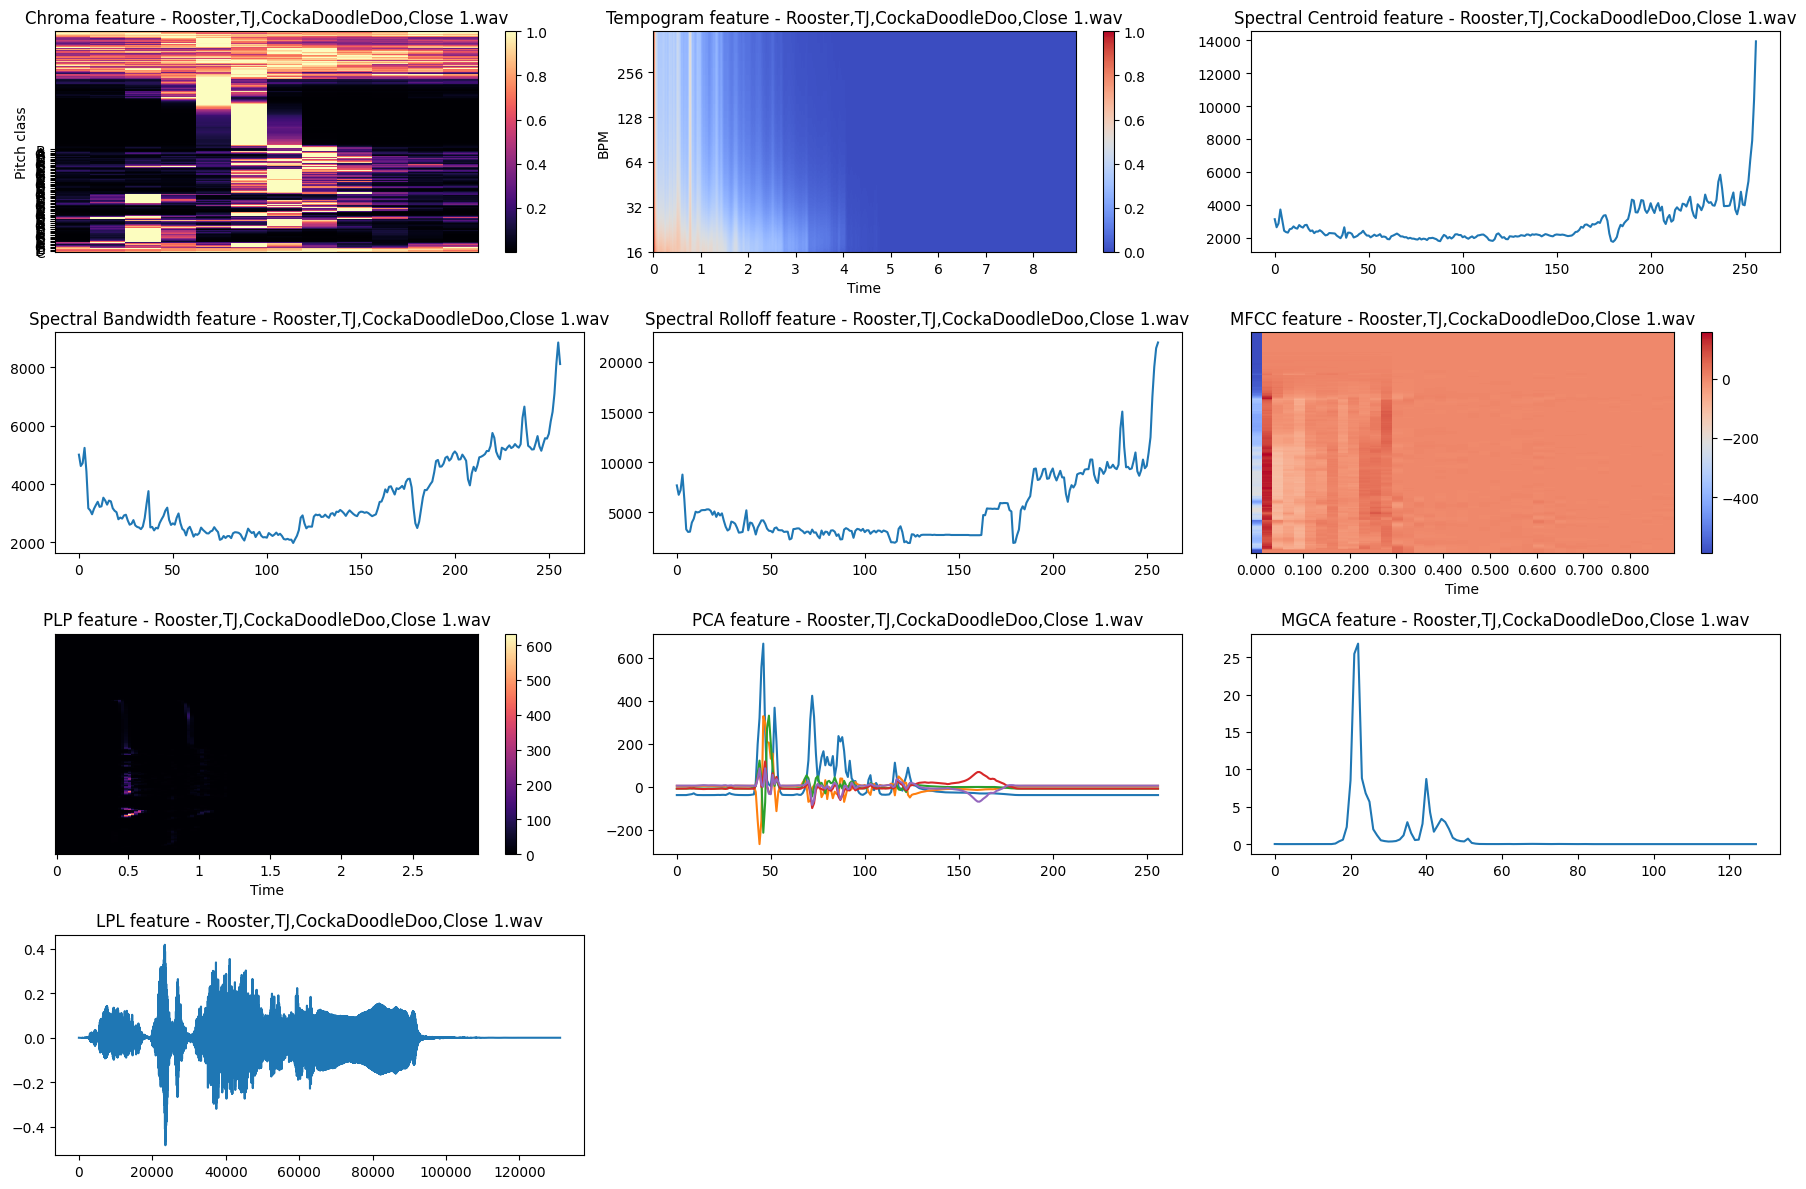

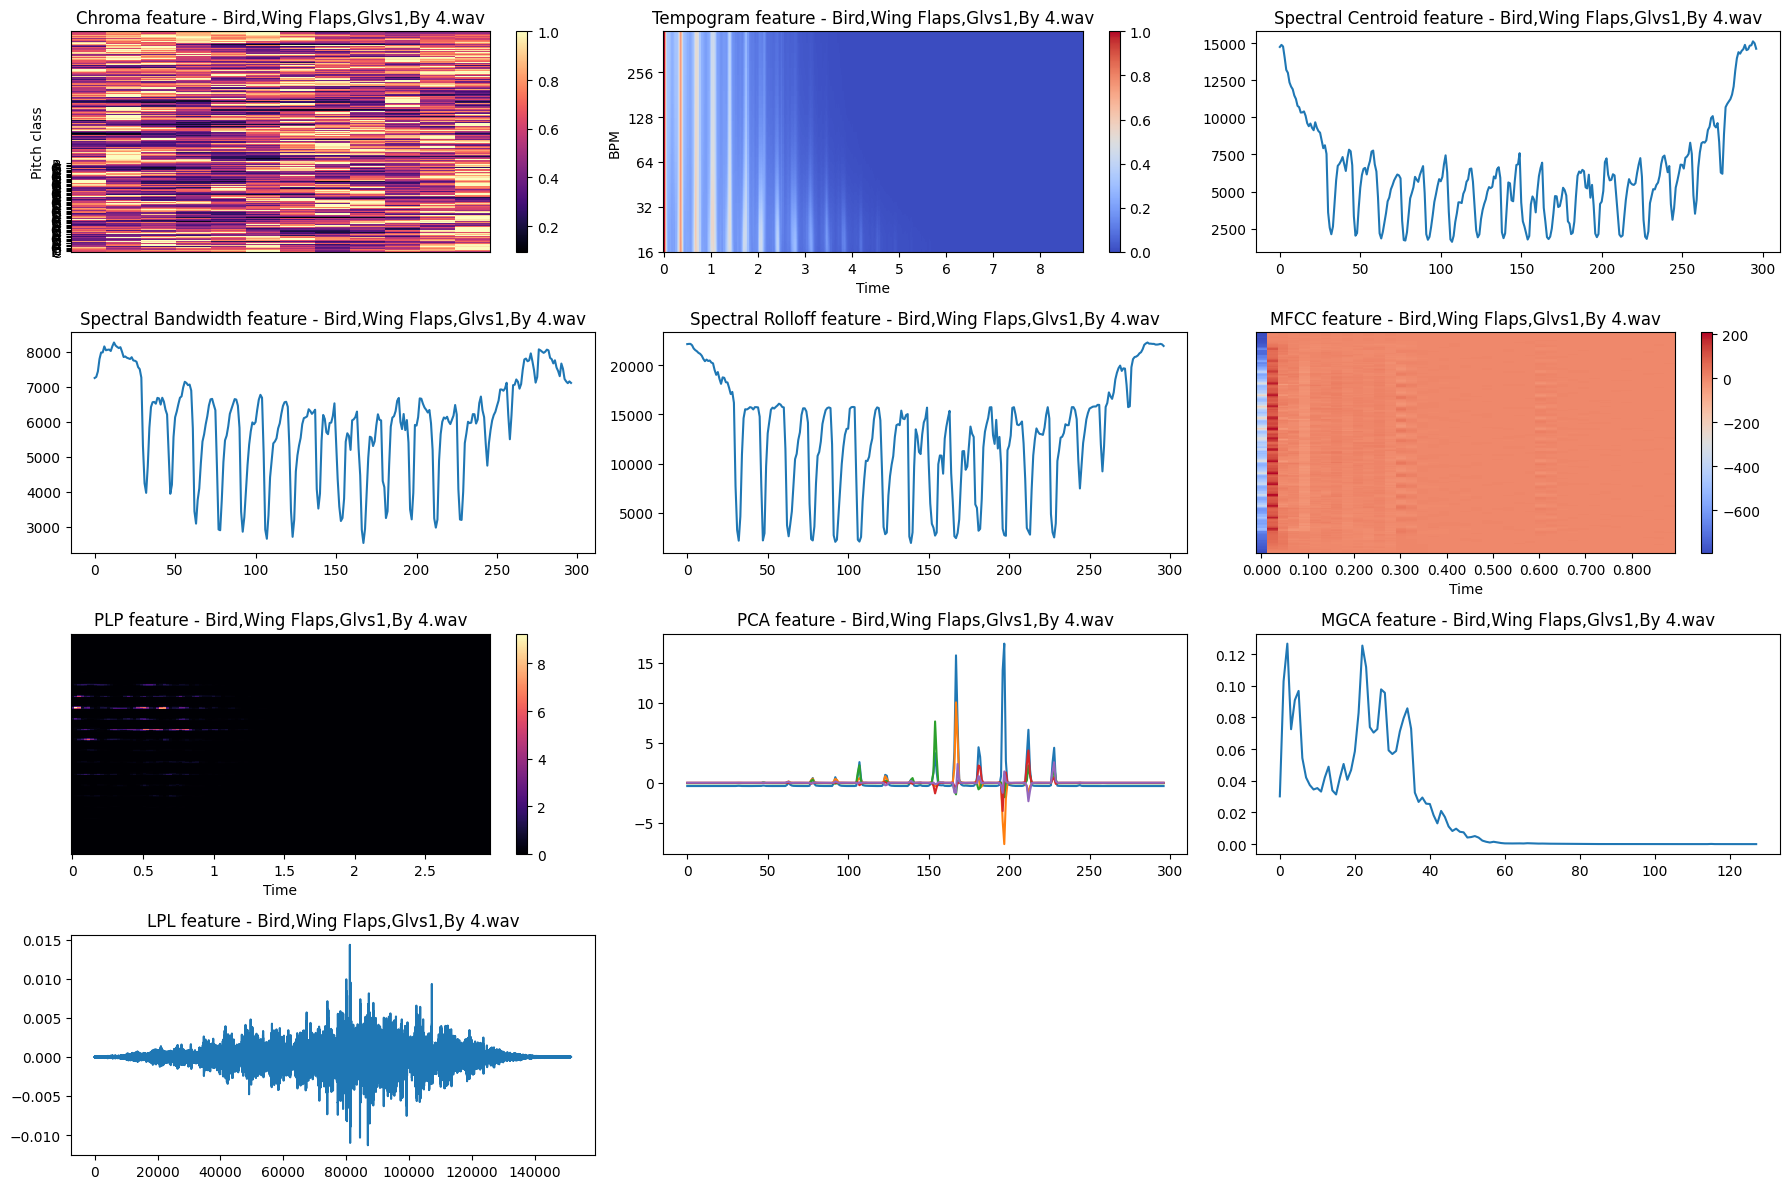

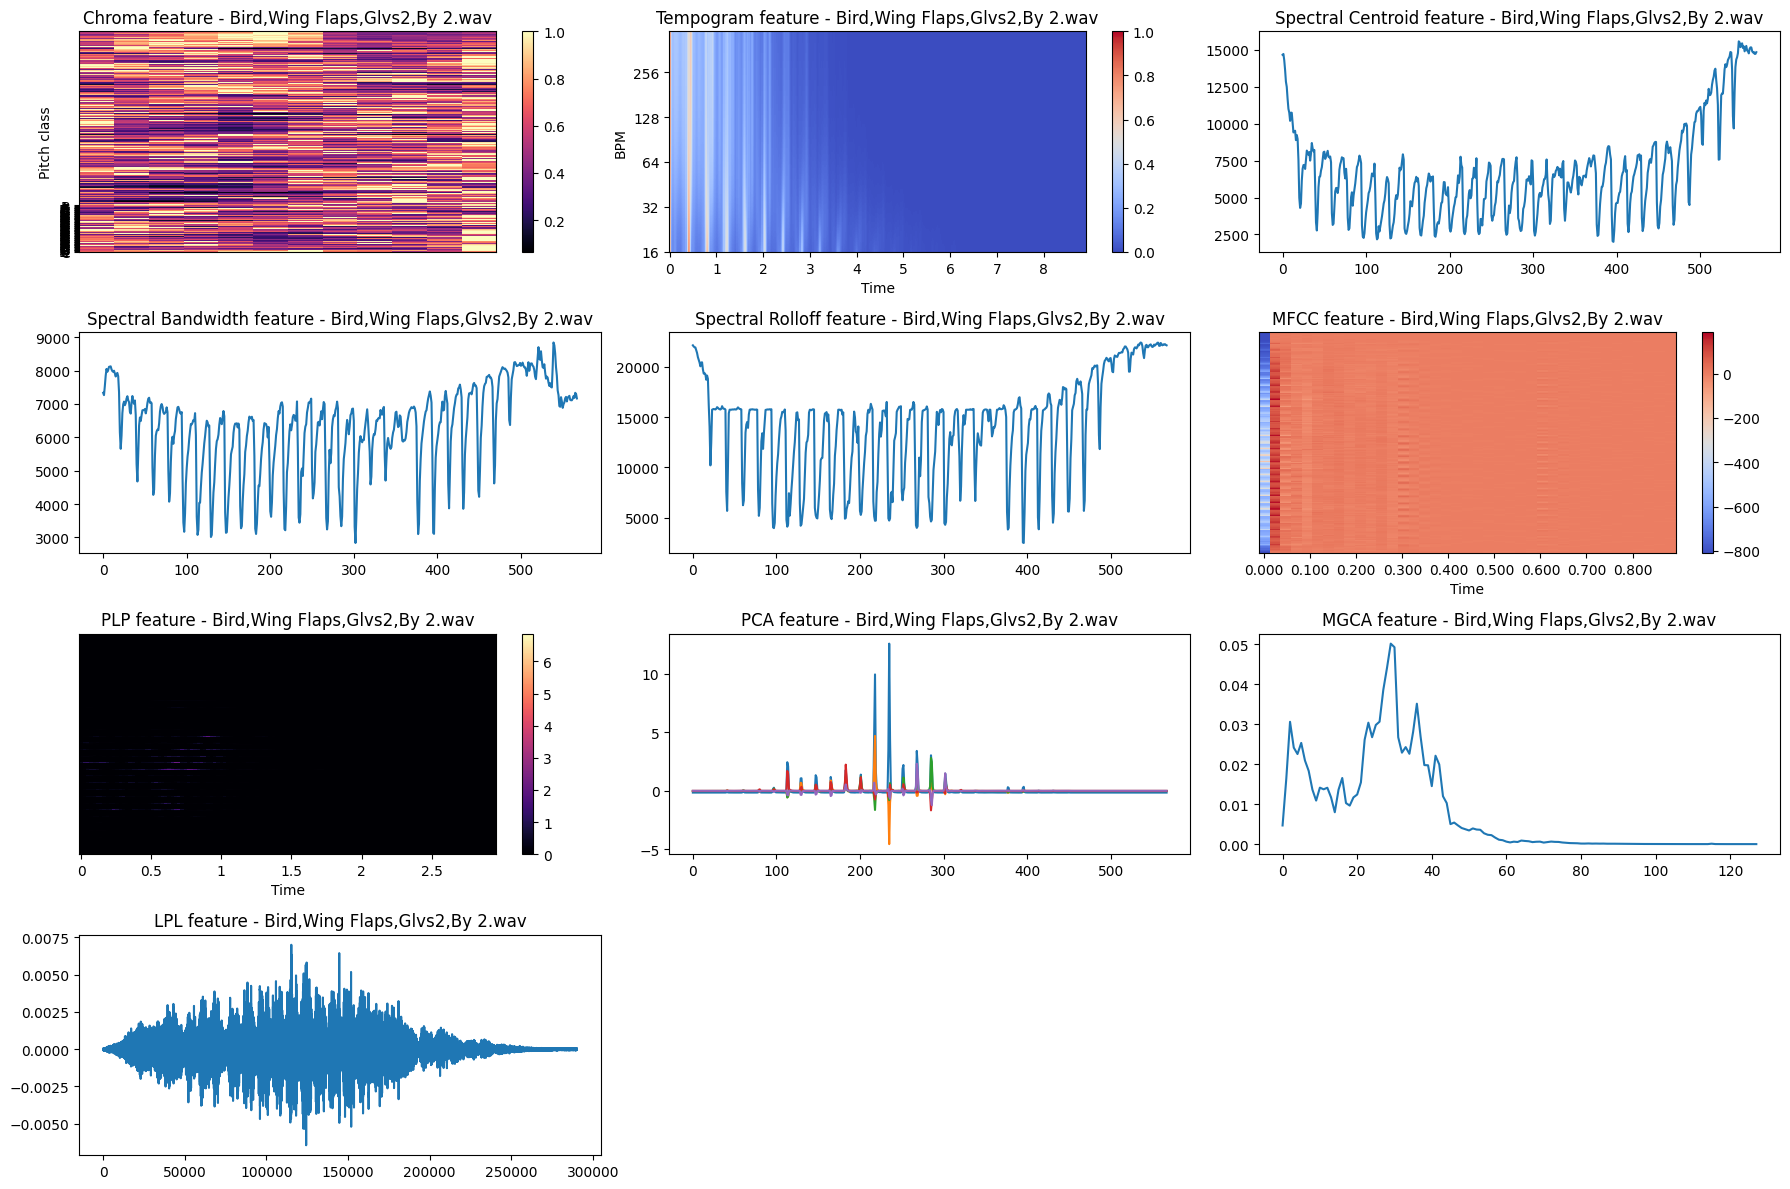

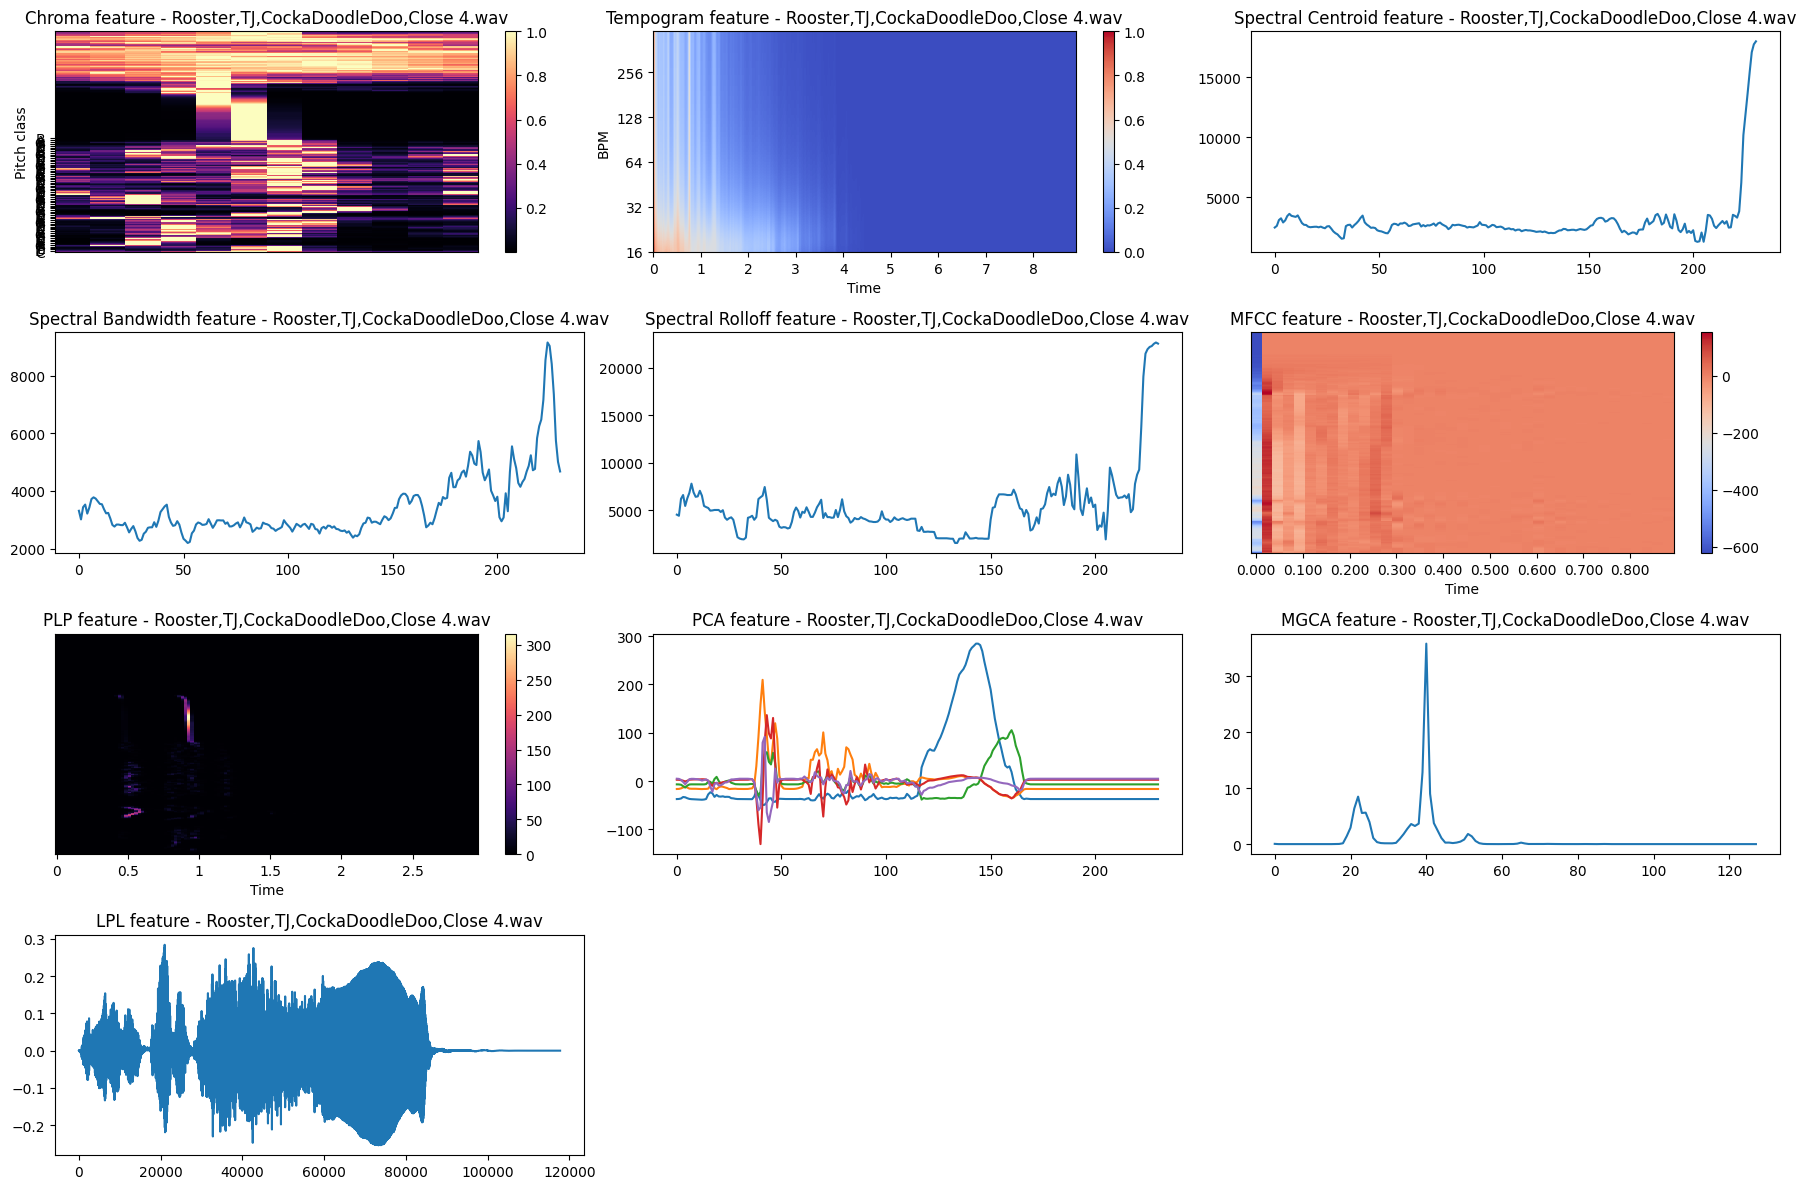

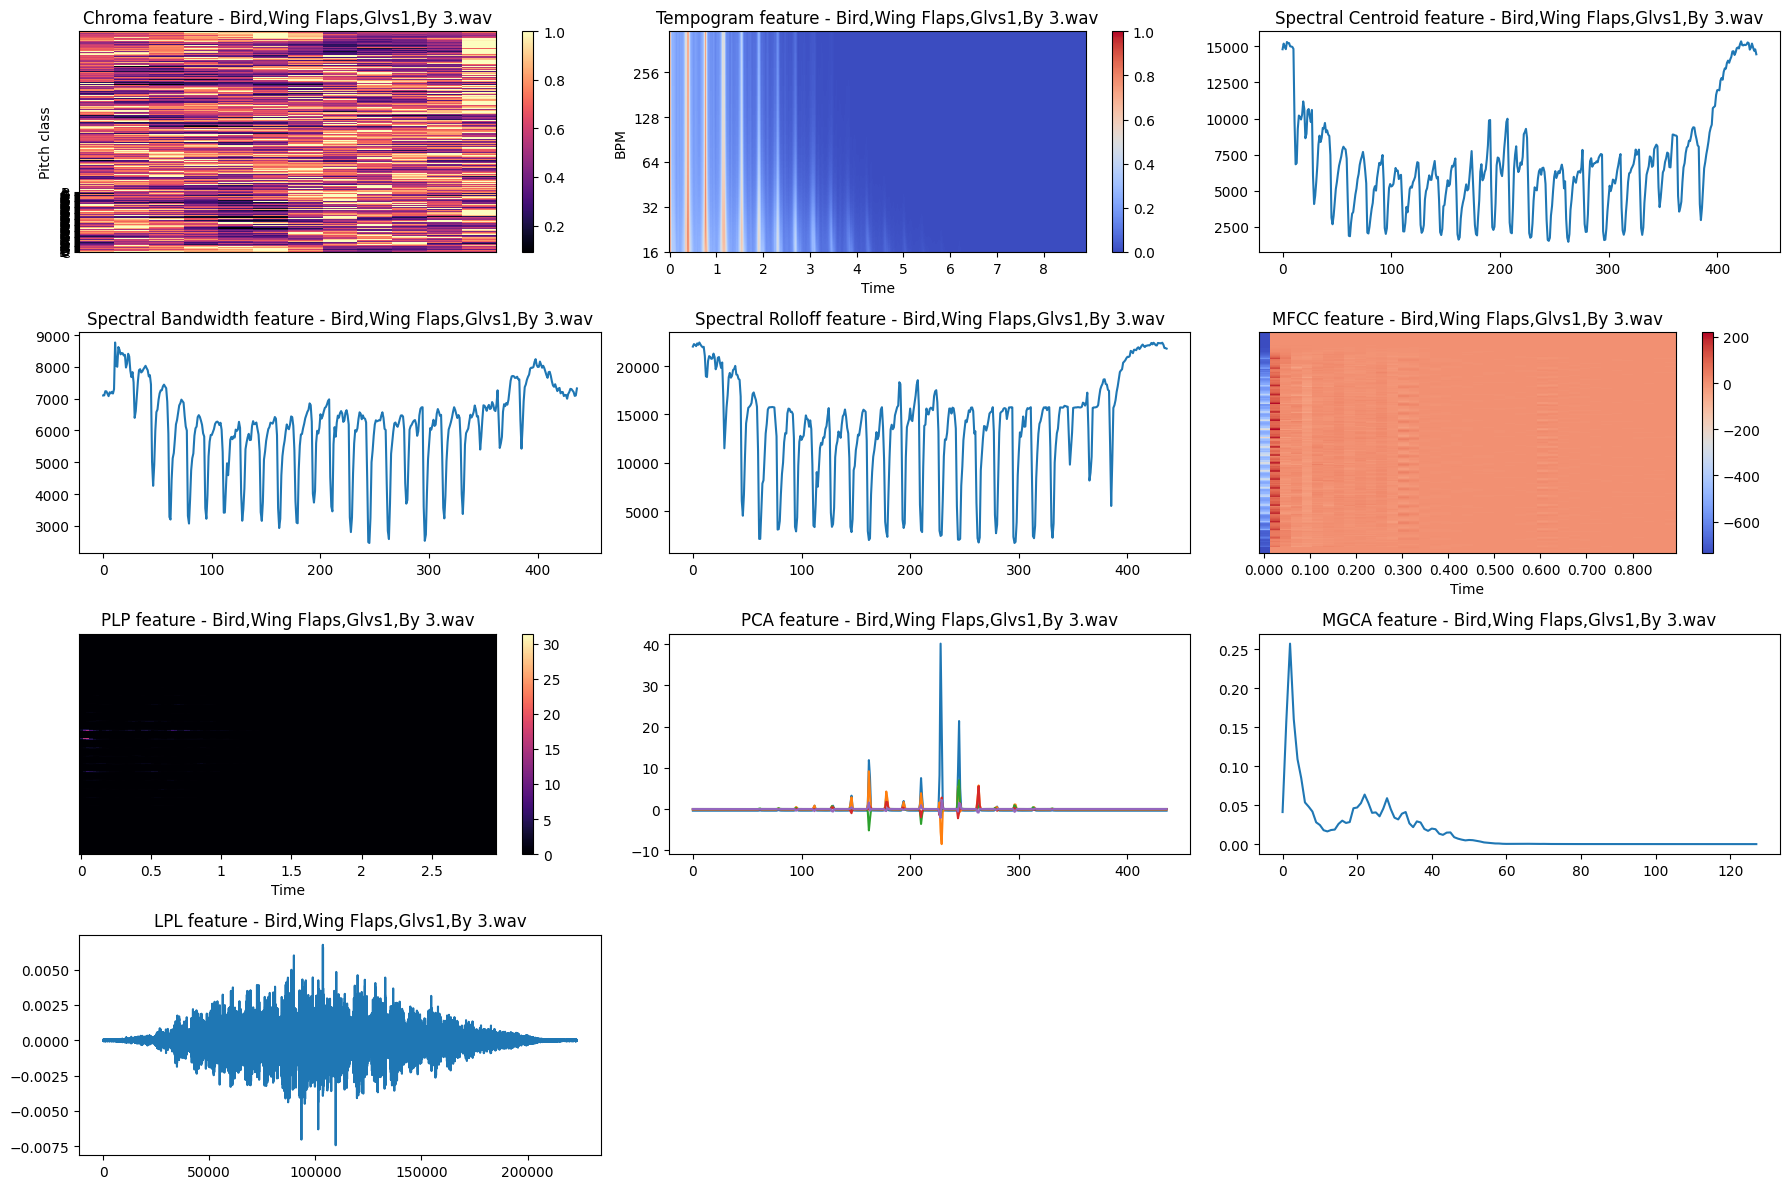

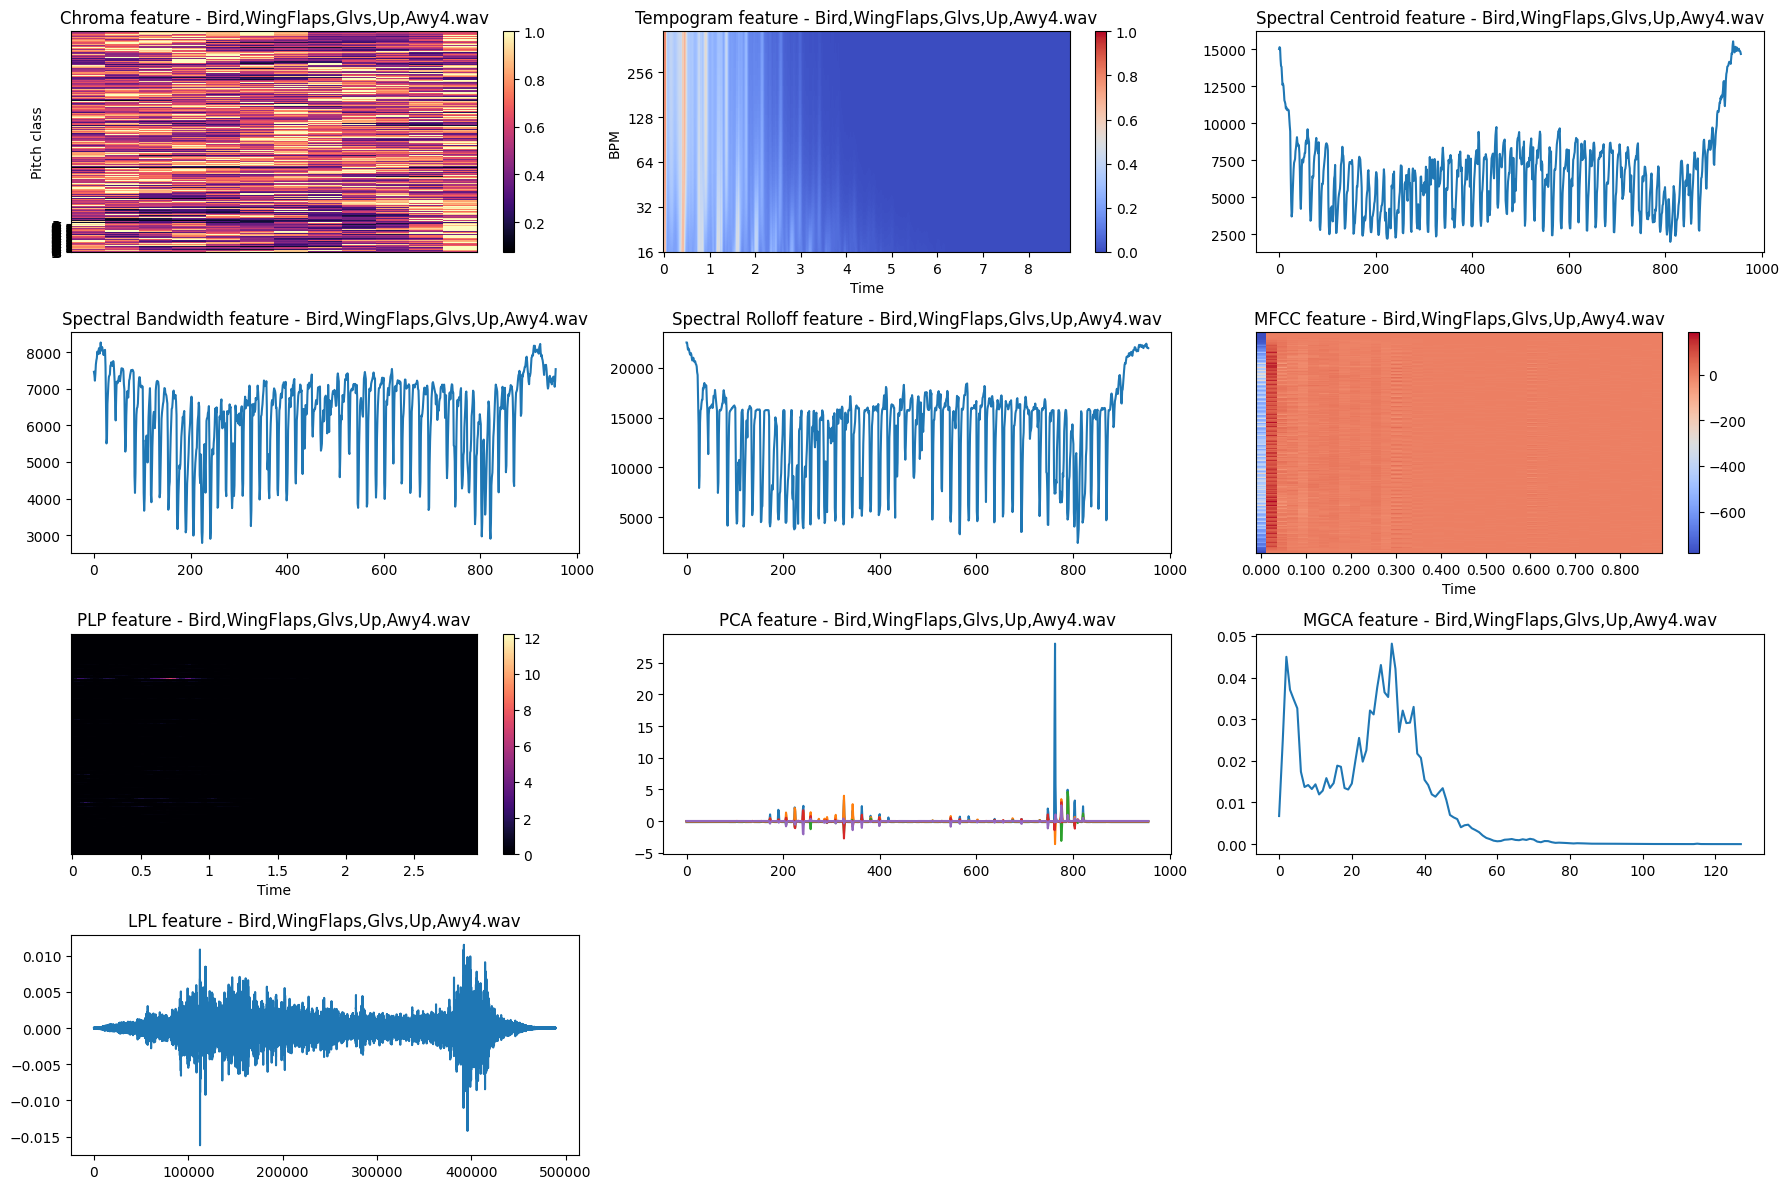

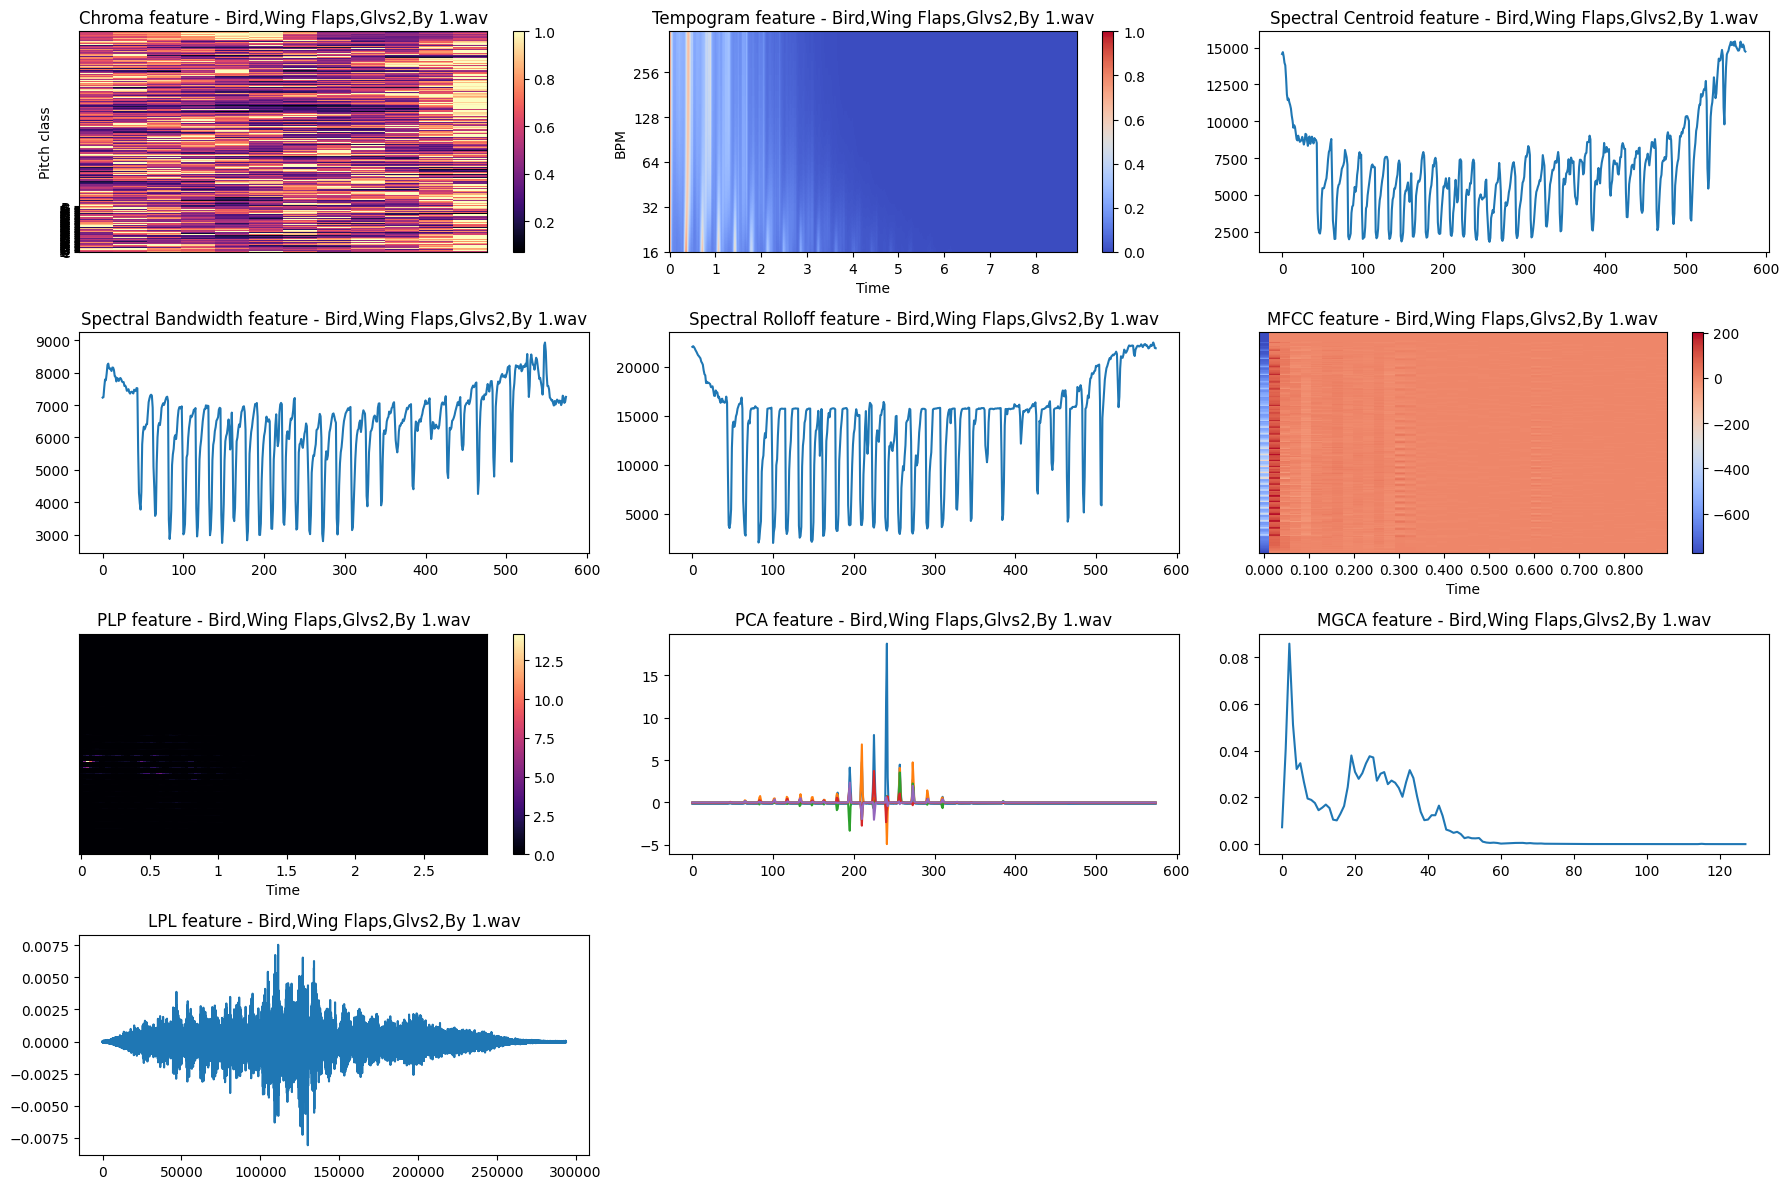

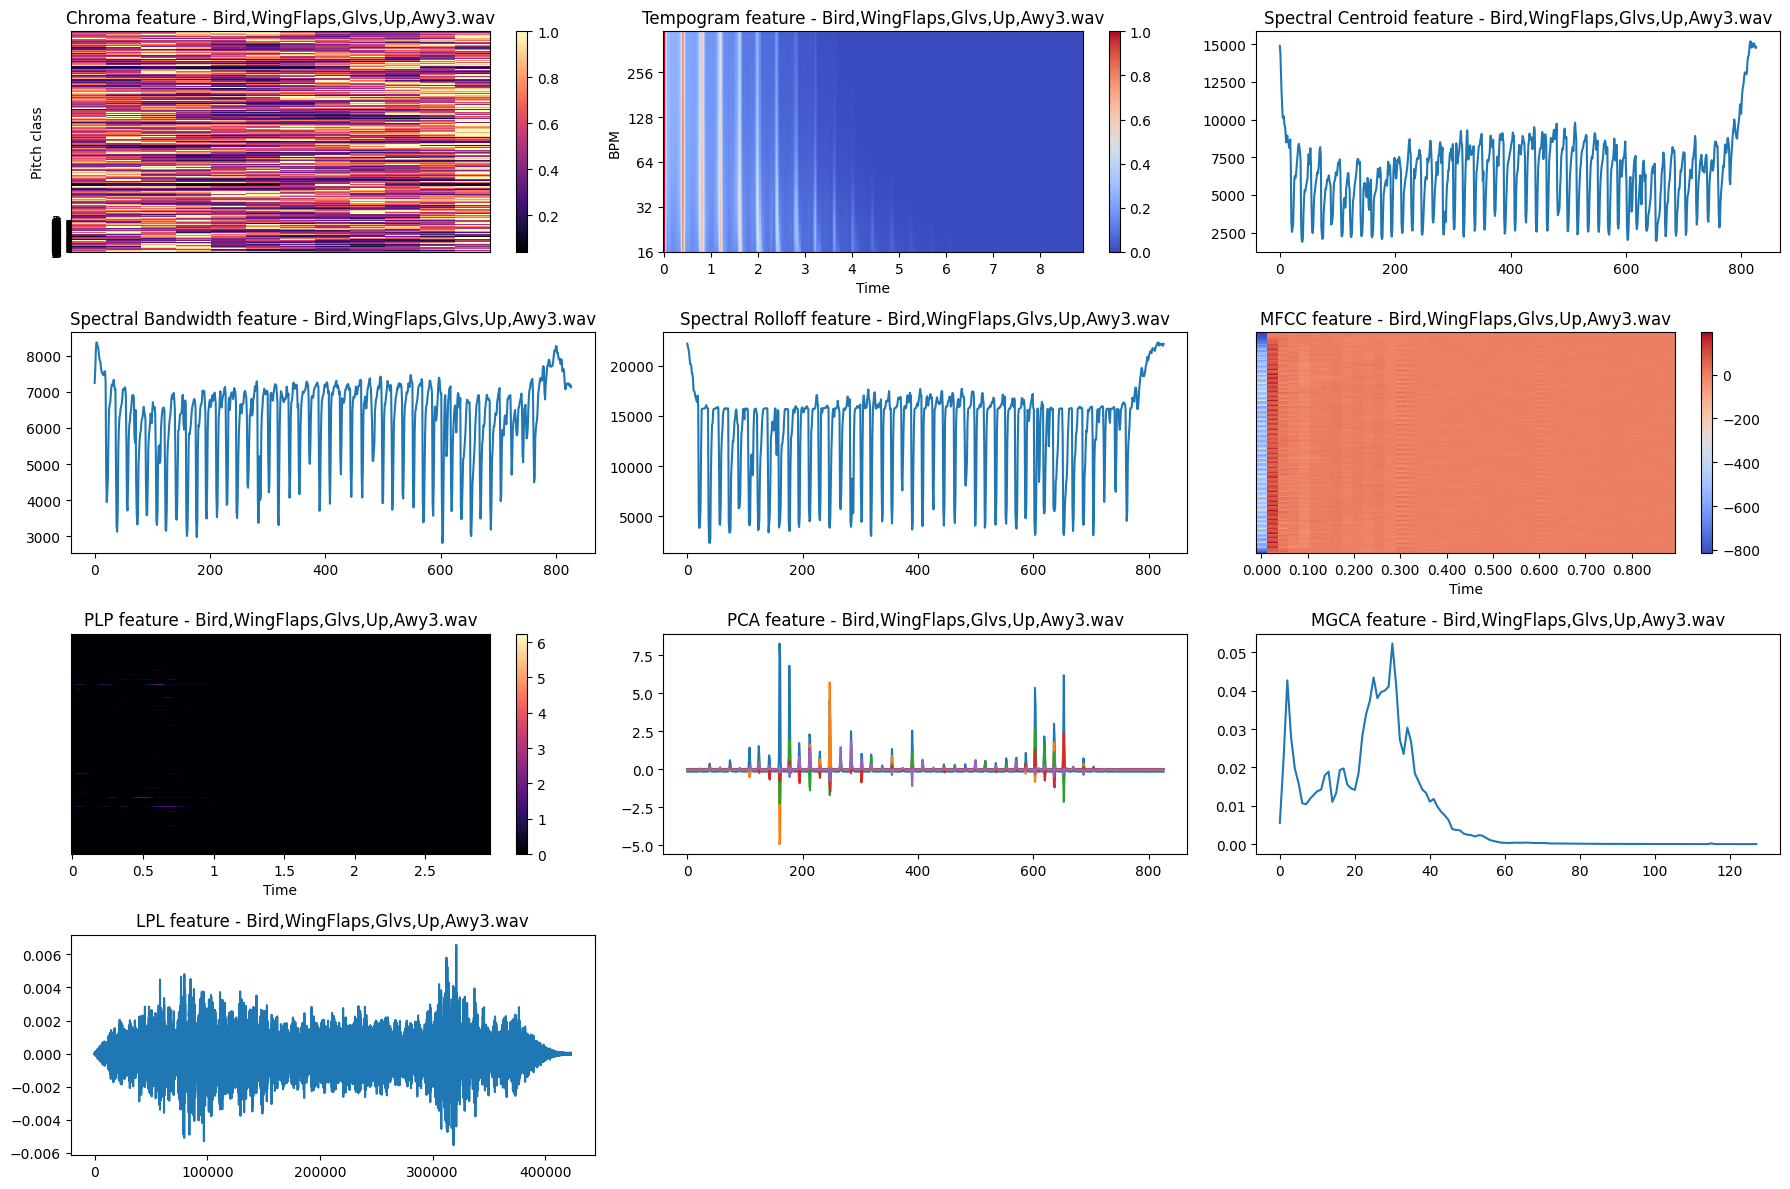

In [2]:

import matplotlib.pyplot as plt
import os
import pandas as pd
import librosa
import librosa.display
from sklearn.decomposition import PCA
import numpy as np

import librosa
import numpy as np
from sklearn.decomposition import PCA

def extract_mfcc_delta_delta(waveform, sr):
    mfcc = librosa.feature.mfcc(y=waveform, sr=sr, n_mfcc=13)
    delta = librosa.feature.delta(mfcc)
    delta_delta = librosa.feature.delta(mfcc, order=2)
    return np.concatenate((mfcc, delta, delta_delta), axis=0)


def extract_plp(waveform, sr):
    plp = librosa.feature.melspectrogram(y=waveform, sr=sr)
    return plp

def extract_pca(feature_matrix, n_components=5):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(feature_matrix)
    return pca_result

def extract_mgca(feature_matrix):
    mgca = np.mean(feature_matrix, axis=1)
    return mgca

def extract_lpl(waveform, sr):
    lpl = librosa.effects.harmonic(waveform)
    return lpl


# تعریف توابع استخراج ویژگی‌ها (مانند extract_mfcc_delta_delta، extract_spectral_envelope، و ...)
# ...

def extract_and_plot_features(audio_directory, output_directory):
    # لیستی از فایل‌های صوتی در دایرکتوری
    audio_files = [f for f in os.listdir(audio_directory) if f.endswith('.wav')]

    for audio_file in audio_files:
        # ساخت دیتافریم‌ها برای هر ویژگی
        chroma_df = pd.DataFrame()
        tempogram_df = pd.DataFrame()
        centroid_df = pd.DataFrame()
        bandwidth_df = pd.DataFrame()
        rolloff_df = pd.DataFrame()
        mfcc_df = pd.DataFrame()

        plp_df = pd.DataFrame()
        pca_df = pd.DataFrame()
        mgca_df = pd.DataFrame()
        lpl_df = pd.DataFrame()

        # تشکیل مسیر کامل به فایل صوتی
        audio_file_path = os.path.join(audio_directory, audio_file)

        # بارگیری موج صوتی با استفاده از librosa
        waveform, sr = librosa.load(audio_file_path, sr=None)

        # استخراج ویژگی‌های مختلف صوتی
        chroma = librosa.feature.chroma_stft(y=waveform, sr=sr)
        tempogram = librosa.feature.tempogram(y=waveform, sr=sr)
        centroid = librosa.feature.spectral_centroid(y=waveform, sr=sr)
        bandwidth = librosa.feature.spectral_bandwidth(y=waveform, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=waveform, sr=sr)
        mfcc_delta_delta = extract_mfcc_delta_delta(waveform, sr)

        plp = extract_plp(waveform, sr)
        pca_result = extract_pca(plp.T)
        mgca = extract_mgca(plp)
        lpl = extract_lpl(waveform, sr)

        # اضافه کردن ویژگی‌ها به دیتافریم‌ها
        chroma_df = pd.concat([chroma_df, pd.DataFrame(chroma.T)], ignore_index=True)
        tempogram_df = pd.concat([tempogram_df, pd.DataFrame(tempogram.T)], ignore_index=True)
        centroid_df = pd.concat([centroid_df, pd.DataFrame(centroid.T)], ignore_index=True)
        bandwidth_df = pd.concat([bandwidth_df, pd.DataFrame(bandwidth.T)], ignore_index=True)
        rolloff_df = pd.concat([rolloff_df, pd.DataFrame(rolloff.T)], ignore_index=True)
        mfcc_df = pd.concat([mfcc_df, pd.DataFrame(mfcc_delta_delta.T)], ignore_index=True)

        plp_df = pd.concat([plp_df, pd.DataFrame(plp.T)], ignore_index=True)
        pca_df = pd.concat([pca_df, pd.DataFrame(pca_result)], ignore_index=True)
        mgca_df = pd.concat([mgca_df, pd.DataFrame(mgca)], ignore_index=True)
        lpl_df = pd.concat([lpl_df, pd.DataFrame(lpl)], ignore_index=True)

        # ذخیره داده‌ها در فایل‌های CSV (خارج از حلقه)
        chroma_df.to_csv(os.path.join(output_directory, f'chroma_data_{audio_file}.csv'), index=False)
        tempogram_df.to_csv(os.path.join(output_directory, f'tempogram_data_{audio_file}.csv'), index=False)
        centroid_df.to_csv(os.path.join(output_directory, f'centroid_data_{audio_file}.csv'), index=False)
        bandwidth_df.to_csv(os.path.join(output_directory, f'bandwidth_data_{audio_file}.csv'), index=False)
        rolloff_df.to_csv(os.path.join(output_directory, f'rolloff_data_{audio_file}.csv'), index=False)
        mfcc_df.to_csv(os.path.join(output_directory, f'mfcc_data_{audio_file}.csv'), index=False)

        plp_df.to_csv(os.path.join(output_directory, f'plp_data_{audio_file}.csv'), index=False)
        pca_df.to_csv(os.path.join(output_directory, f'pca_data_{audio_file}.csv'), index=False)
        mgca_df.to_csv(os.path.join(output_directory, f'mgca_data_{audio_file}.csv'), index=False)
        lpl_df.to_csv(os.path.join(output_directory, f'lpl_data_{audio_file}.csv'), index=False)

        # نمایش ماتریس ویژگی‌ها
        plt.figure(figsize=(18, 12))

        # نمایش chroma
        plt.subplot(4, 3, 1)
        librosa.display.specshow(chroma_df.values, y_axis='chroma')
        plt.colorbar()
        plt.title(f'Chroma feature - {audio_file}')

        # نمایش tempogram
        plt.subplot(4, 3, 2)
        librosa.display.specshow(tempogram_df.values, x_axis='time', y_axis='tempo')
        plt.colorbar()
        plt.title(f'Tempogram feature - {audio_file}')

        # نمایش centroid
        plt.subplot(4, 3, 3)
        plt.plot(centroid_df.values)
        plt.title(f'Spectral Centroid feature - {audio_file}')

        # نمایش bandwidth
        plt.subplot(4, 3, 4)
        plt.plot(bandwidth_df.values)
        plt.title(f'Spectral Bandwidth feature - {audio_file}')

        # نمایش rolloff
        plt.subplot(4, 3, 5)
        plt.plot(rolloff_df.values)
        plt.title(f'Spectral Rolloff feature - {audio_file}')

        # نمایش mfcc
        plt.subplot(4, 3, 6)
        librosa.display.specshow(mfcc_df.values, x_axis='time')
        plt.colorbar()
        plt.title(f'MFCC feature - {audio_file}')



        # نمایش plp
        plt.subplot(4, 3, 7)
        librosa.display.specshow(plp_df.values, x_axis='time')
        plt.colorbar()
        plt.title(f'PLP feature - {audio_file}')

        # نمایش pca
        plt.subplot(4, 3, 8)
        plt.plot(pca_df.values)
        plt.title(f'PCA feature - {audio_file}')

        # نمایش mgca
        plt.subplot(4, 3, 9)
        plt.plot(mgca_df.values)
        plt.title(f'MGCA feature - {audio_file}')

        # نمایش lpl
        plt.subplot(4, 3, 10)
        plt.plot(lpl_df.values)
        plt.title(f'LPL feature - {audio_file}')

        plt.tight_layout()
        plt.show()

# تعیین مسیر دایرکتوری حاوی فایل‌های صوتی
audio_directory = '/content/drive/MyDrive/unzipped/Big Room Sound Birds and Nature'

# تعیین مسیر خروجی برای فایل‌های CSV
output_directory = '/content/drive/MyDrive/unzipped/'

# اجرای تابع برای استخراج ویژگی‌ها و رسم نمودارها
extract_and_plot_features(audio_directory, output_directory)

